## EIA Monthly Electric Grid Data - Generation Operations
## Exploratory Data Analysis

https://www.eia.gov/electricity/gridmonitor/about

In [47]:
import pandas as pd
import numpy as np

# genops.csv was retrieved from the U.S. Energy Information Administration API using code 
# in EIA_GetData3.ipynb
csv_path = 'genops.csv'

genops = pd.read_csv(csv_path, low_memory=False)
genops.shape

#eia_data['value'] = pd.to_numeric(eia_data['value'], errors='coerce')
#eia_data['period'] = pd.to_datetime(eia_data['period'], yearfirst=True, errors='coerce')
#eia_data = eia_data.rename(columns = {'value':'MWh'})
#eia_data = eia_data[['period','respondent','respondent_name', 'type', 'type_name', 'MWh']]

(852061, 22)

In [48]:
genops = genops.drop_duplicates()
genops.shape

(852061, 22)

In [49]:
genops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852061 entries, 0 to 852060
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   period                        852061 non-null  object 
 1   plantCode                     852061 non-null  int64  
 2   plantName                     851980 non-null  object 
 3   fuel2002                      852061 non-null  object 
 4   fuelTypeDescription           852061 non-null  object 
 5   state                         850650 non-null  object 
 6   stateDescription              849168 non-null  object 
 7   primeMover                    852061 non-null  object 
 8   average-heat-content          628597 non-null  float64
 9   average-heat-content-units    336670 non-null  object 
 10  consumption-for-eg            628597 non-null  float64
 11  consumption-for-eg-units      336670 non-null  object 
 12  consumption-for-eg-btu        852061 non-nul

In [50]:
genops.head()

,period,plantCode,plantName,fuel2002,fuelTypeDescription,state,stateDescription,primeMover,average-heat-content,average-heat-content-units,...,consumption-for-eg-btu,generation,gross-generation,total-consumption,total-consumption-units,total-consumption-btu,consumption-for-eg-btu-units,generation-units,gross-generation-units,total-consumption-btu-units
0,2022-12,3,Barry,SUB,Coal,AL,Alabama,ST,0.000,MMBtu per short tons,...,0,0.00,0.00,0.0,MMBtu per short tons,0,MMBtu,megawatthours,megawatthours,MMBtu
1,2022-12,8223,Springerville,SUN,Solar,AZ,Arizona,ALL,0.000,NaN,...,8527,964.26,974.00,0.0,NaN,8527,MMBtu,megawatthours,megawatthours,MMBtu
2,2022-12,8223,Springerville,SUB,Coal,AZ,Arizona,ALL,18.053,MMBtu per short tons,...,8380726,741778.54,880021.41,464229.0,MMBtu per short tons,8380726,MMBtu,megawatthours,megawatthours,MMBtu
3,2022-12,50955,Rousselot Inc,NG,Natural Gas,MA,Massachusetts,ALL,1.030,MMBtu per Mcf,...,6491,1485.00,1560.00,67871.0,MMBtu per Mcf,69907,MMBtu,megawatthours,megawatthours,MMBtu
4,2022-12,50955,Rousselot Inc,ALL,Total,MA,Massachusetts,ALL,NaN,NaN,...,6491,1485.00,1560.00,NaN,NaN,69907,MMBtu,megawatthours,megawatthours,MMBtu


In [51]:
genops.columns = genops.columns.str.replace('-', '_')
genops['period'] = pd.to_datetime(genops['period'], yearfirst=True, errors='coerce')
genops['plantCode'] = 'P' + genops['plantCode'].astype(str)


In [52]:
genops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852061 entries, 0 to 852060
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   period                        852061 non-null  datetime64[ns]
 1   plantCode                     852061 non-null  object        
 2   plantName                     851980 non-null  object        
 3   fuel2002                      852061 non-null  object        
 4   fuelTypeDescription           852061 non-null  object        
 5   state                         850650 non-null  object        
 6   stateDescription              849168 non-null  object        
 7   primeMover                    852061 non-null  object        
 8   average_heat_content          628597 non-null  float64       
 9   average_heat_content_units    336670 non-null  object        
 10  consumption_for_eg            628597 non-null  float64       
 11  consumption_f

In [53]:
genops.head()

,period,plantCode,plantName,fuel2002,fuelTypeDescription,state,stateDescription,primeMover,average_heat_content,average_heat_content_units,...,consumption_for_eg_btu,generation,gross_generation,total_consumption,total_consumption_units,total_consumption_btu,consumption_for_eg_btu_units,generation_units,gross_generation_units,total_consumption_btu_units
0,2022-12-01,P3,Barry,SUB,Coal,AL,Alabama,ST,0.000,MMBtu per short tons,...,0,0.00,0.00,0.0,MMBtu per short tons,0,MMBtu,megawatthours,megawatthours,MMBtu
1,2022-12-01,P8223,Springerville,SUN,Solar,AZ,Arizona,ALL,0.000,NaN,...,8527,964.26,974.00,0.0,NaN,8527,MMBtu,megawatthours,megawatthours,MMBtu
2,2022-12-01,P8223,Springerville,SUB,Coal,AZ,Arizona,ALL,18.053,MMBtu per short tons,...,8380726,741778.54,880021.41,464229.0,MMBtu per short tons,8380726,MMBtu,megawatthours,megawatthours,MMBtu
3,2022-12-01,P50955,Rousselot Inc,NG,Natural Gas,MA,Massachusetts,ALL,1.030,MMBtu per Mcf,...,6491,1485.00,1560.00,67871.0,MMBtu per Mcf,69907,MMBtu,megawatthours,megawatthours,MMBtu
4,2022-12-01,P50955,Rousselot Inc,ALL,Total,MA,Massachusetts,ALL,NaN,NaN,...,6491,1485.00,1560.00,NaN,NaN,69907,MMBtu,megawatthours,megawatthours,MMBtu


In [54]:
genops.describe(include=['O']).T

,count,unique,top,freq
plantCode,852061,11489,P99999,1330
plantName,851980,11740,State-Fuel Level Increment,1330
fuel2002,852061,42,ALL,223464
fuelTypeDescription,852061,19,Total,223464
state,850650,52,CA,111039
stateDescription,849168,51,California,111039
primeMover,852061,19,ALL,522332
average_heat_content_units,336670,4,MMBtu per Mcf,159952
consumption_for_eg_units,336670,4,Mcf,159952
total_consumption_units,336670,4,MMBtu per Mcf,159952


In [56]:
genops.describe().T

,count,mean,min,25%,50%,75%,max,std
period,852061,2020-03-09 00:44:29.791951104,2018-01-01 00:00:00,2019-02-01 00:00:00,2020-03-01 00:00:00,2021-05-01 00:00:00,2022-12-01 00:00:00,NaN
average_heat_content,628597.0,1.7548,0.0,0.0,0.0,1.03,37.4,4.337507
consumption_for_eg,628597.0,83518.856918,0.0,0.0,0.0,1031.0,127886215.0,541963.229557
consumption_for_eg_btu,852061.0,287022.124615,0.0,556.0,5720.0,60078.0,365985262.0,1532866.588223
generation,852061.0,31240.485951,-154605.0,57.98,651.85,7119.32,40672520.52,159519.776614
gross_generation,852061.0,32890.356386,0.0,80.46,697.31,7766.55,41560782.32,165800.070455
total_consumption,628597.0,97184.810424,0.0,0.0,0.0,1891.0,155973481.0,631164.999321
total_consumption_btu,852061.0,306806.322376,0.0,644.0,6272.0,82915.0,440331497.0,1616138.634292


<Axes: xlabel='period'>

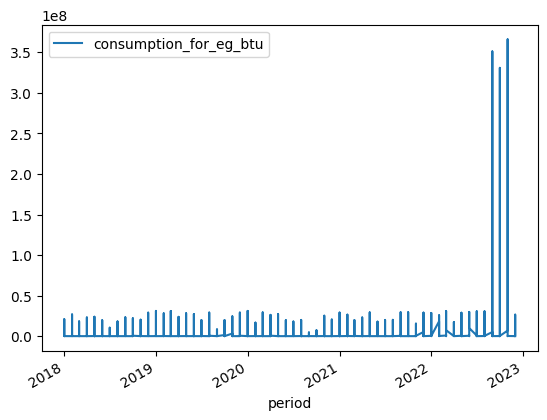

In [58]:
genops.plot(x='period', y='consumption_for_eg_btu')

<Axes: >

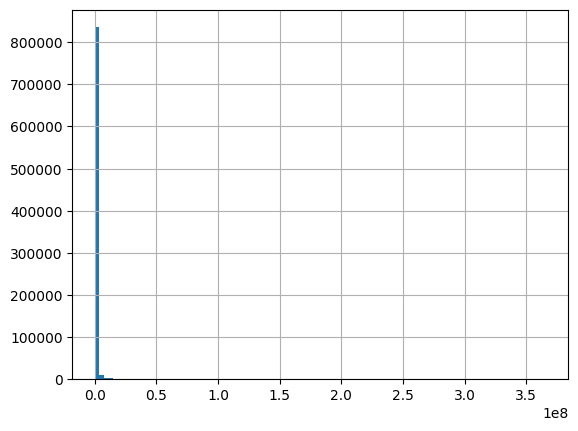

In [62]:
genops.consumption_for_eg_btu.hist(bins=100)

In [ ]:
#group by BA using gencap data

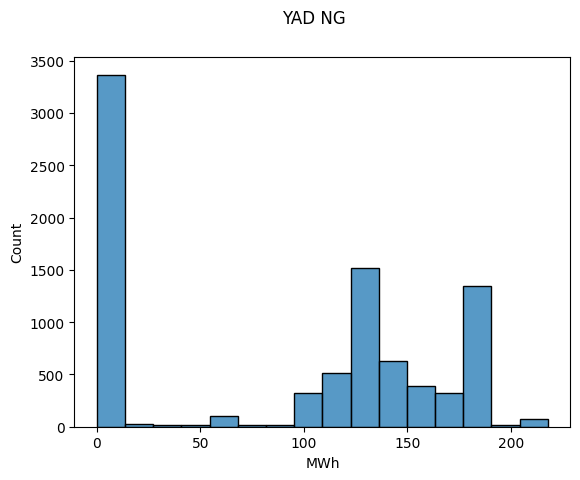

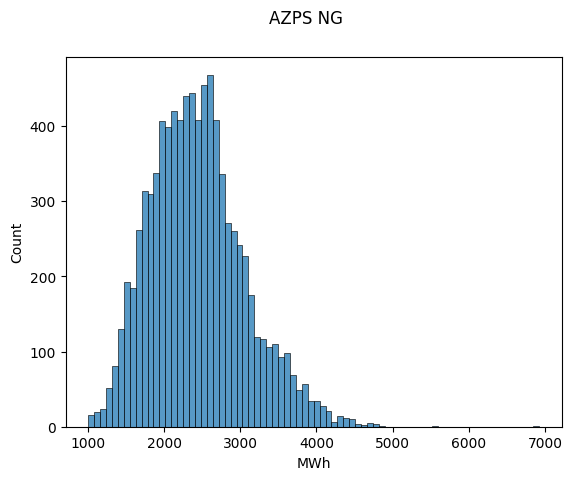

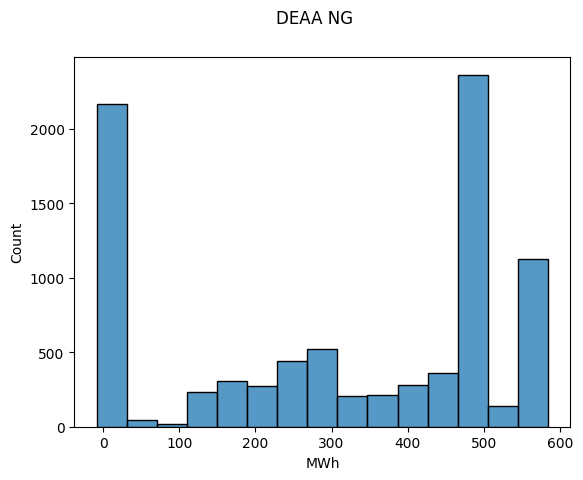

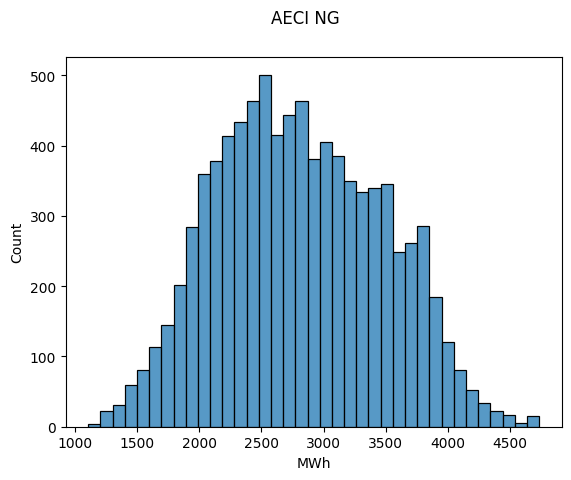

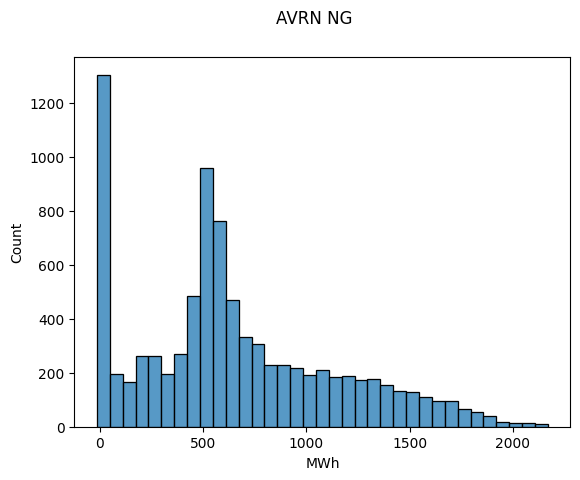

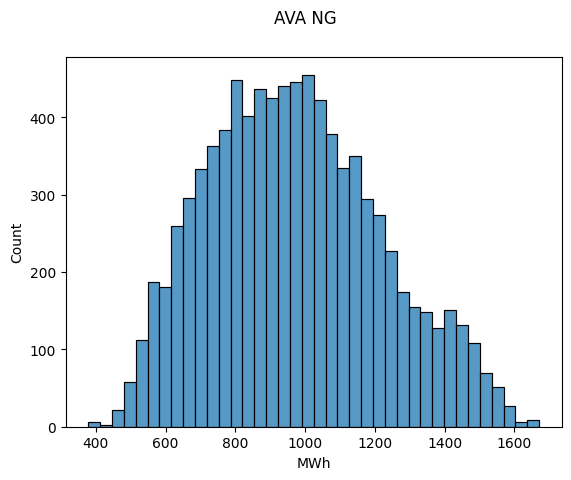

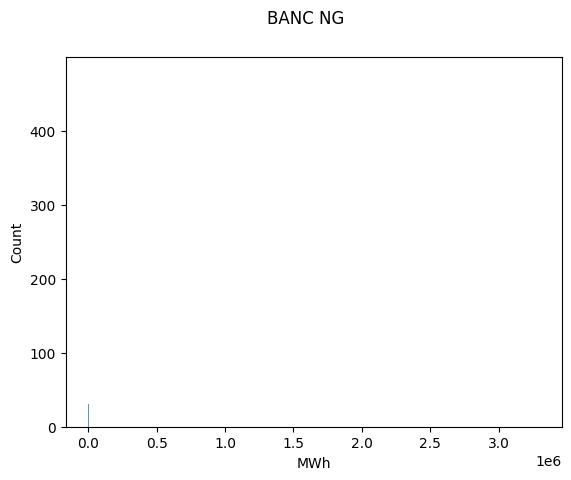

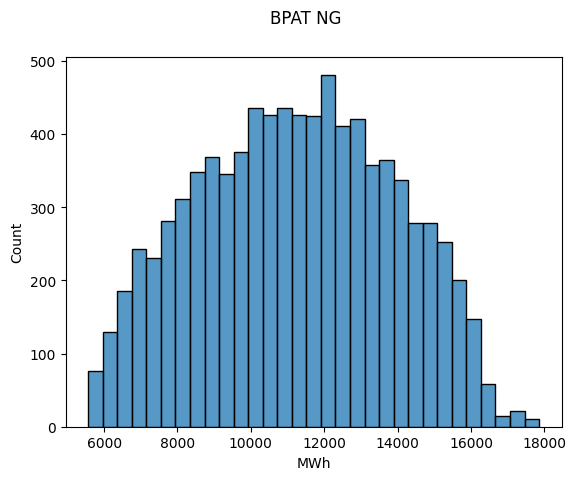

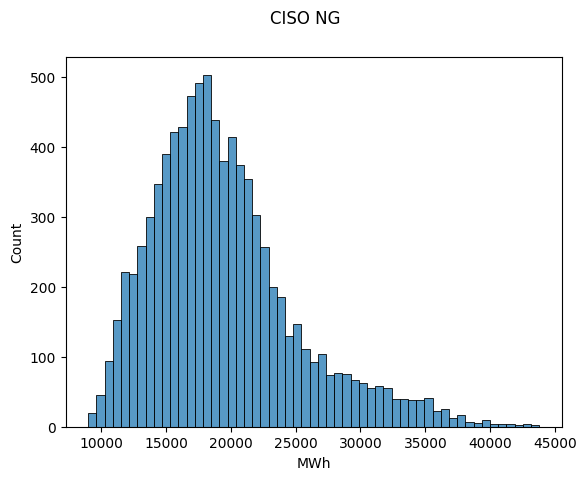

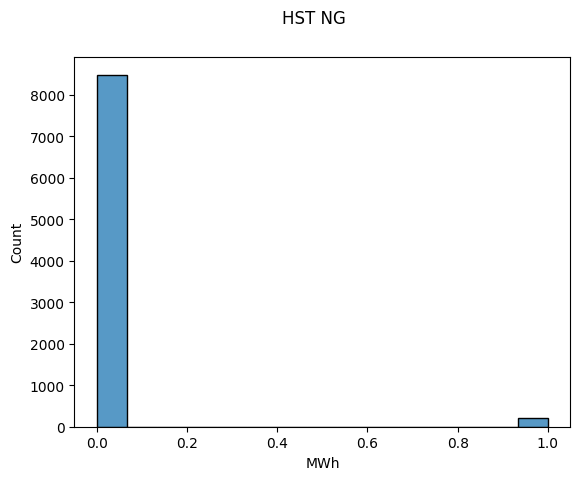

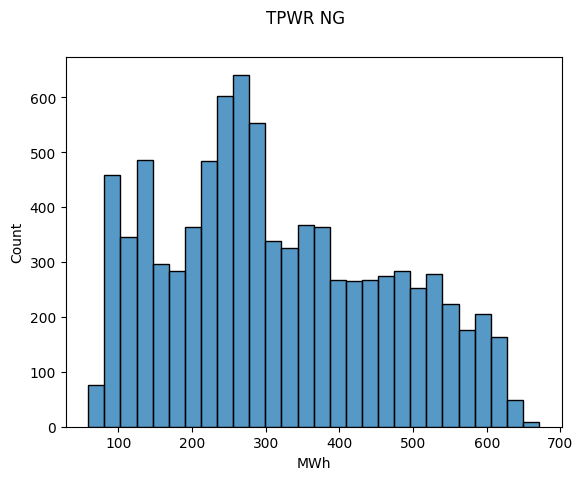

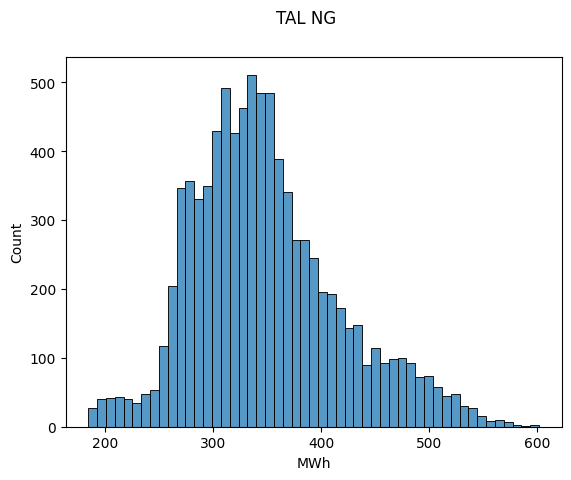

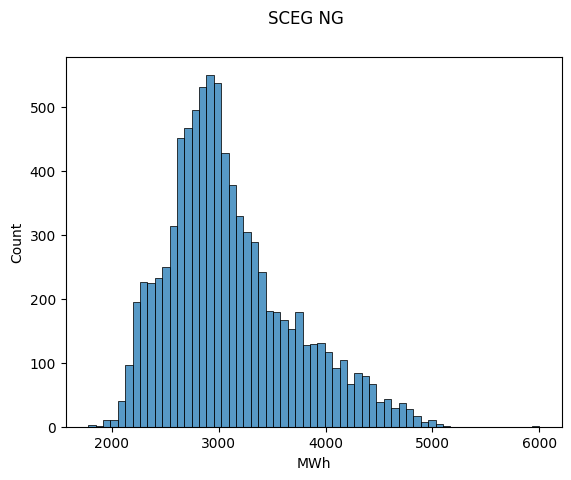

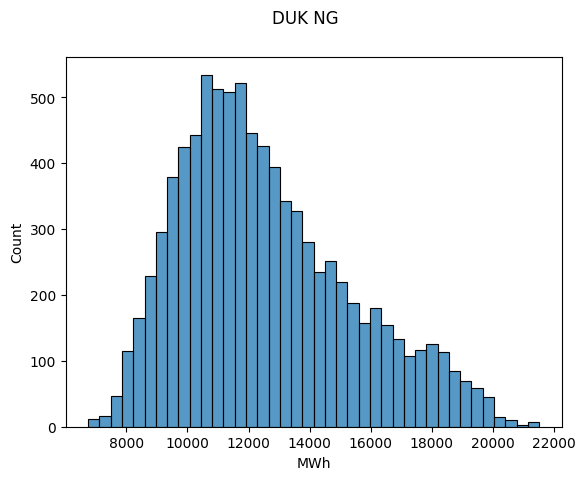

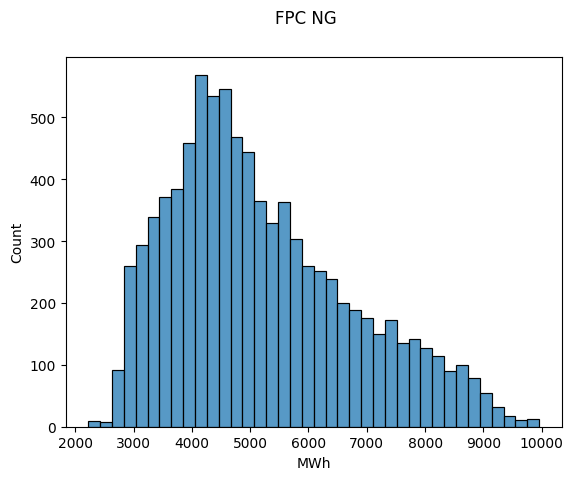

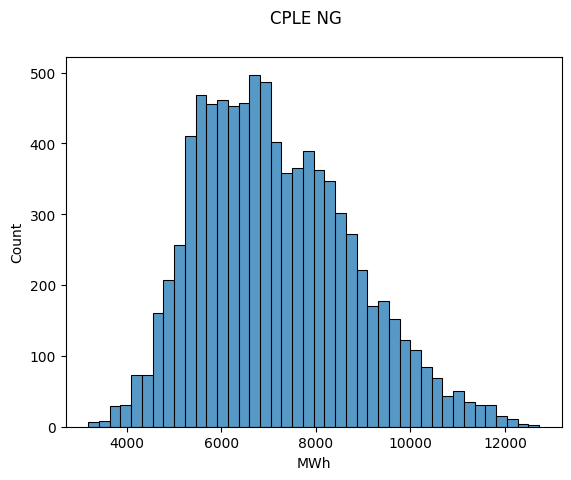

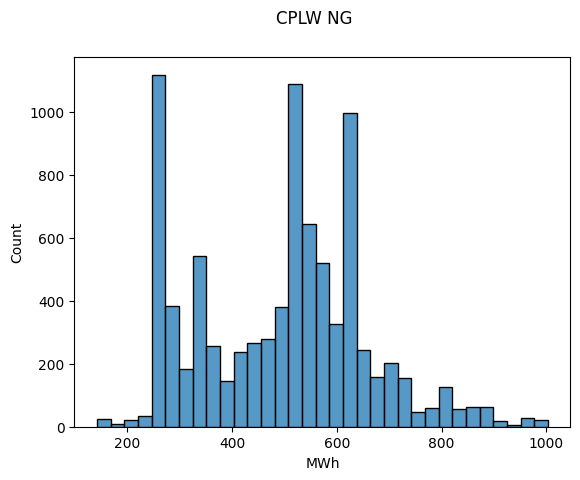

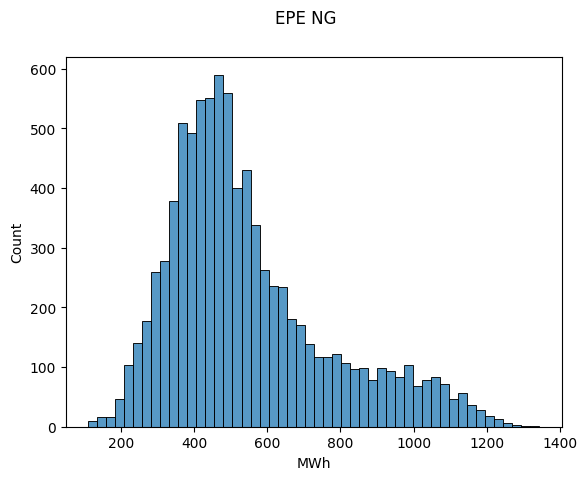

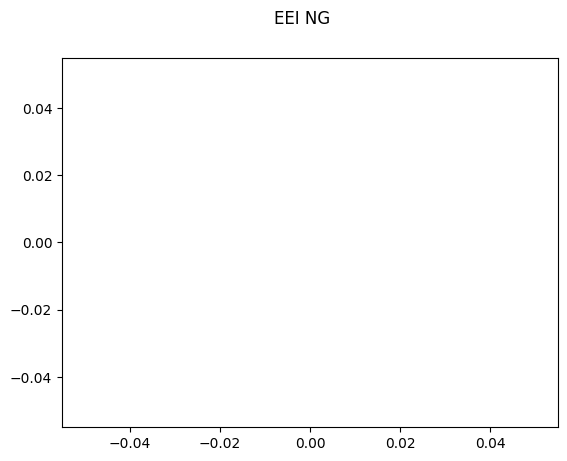

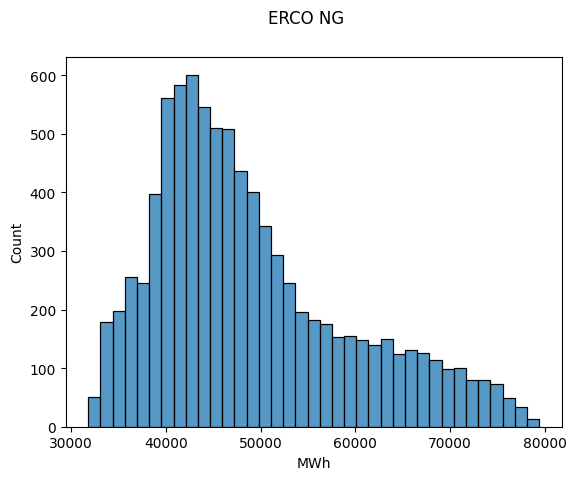

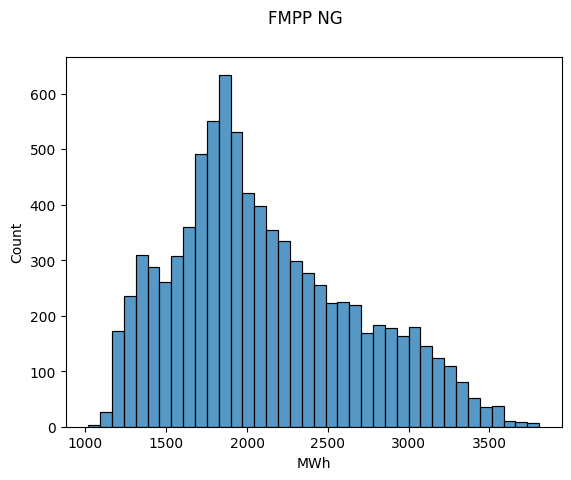

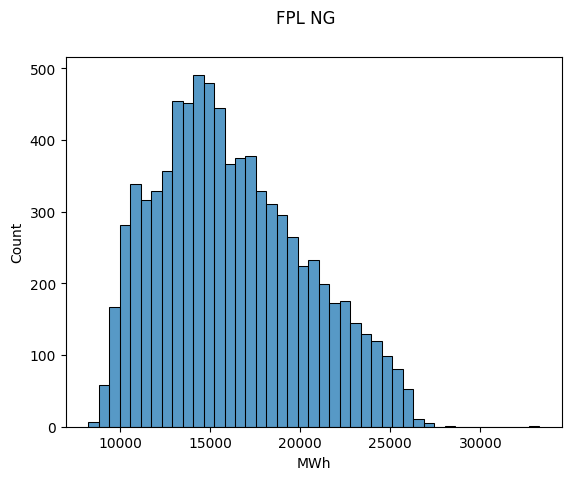

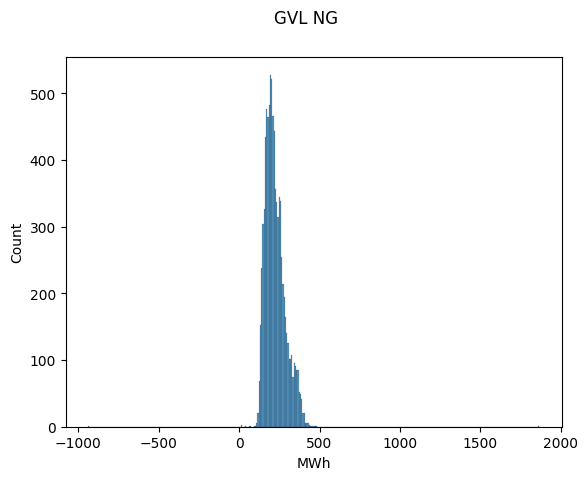

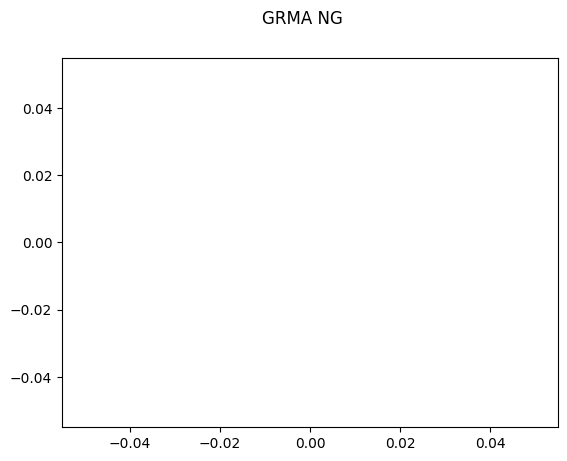

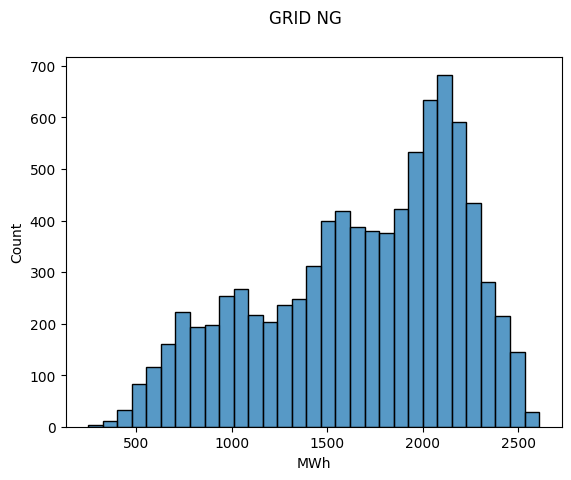

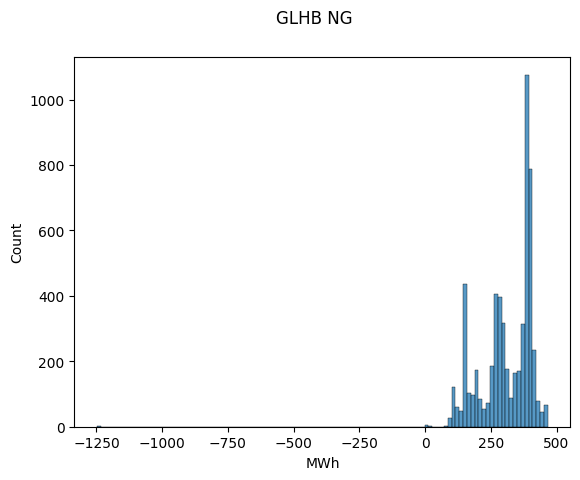

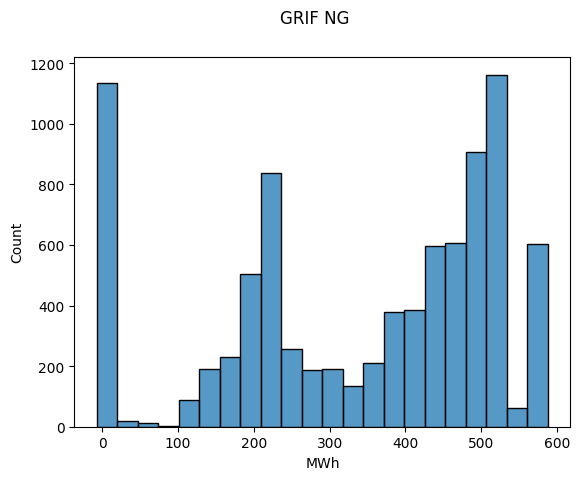

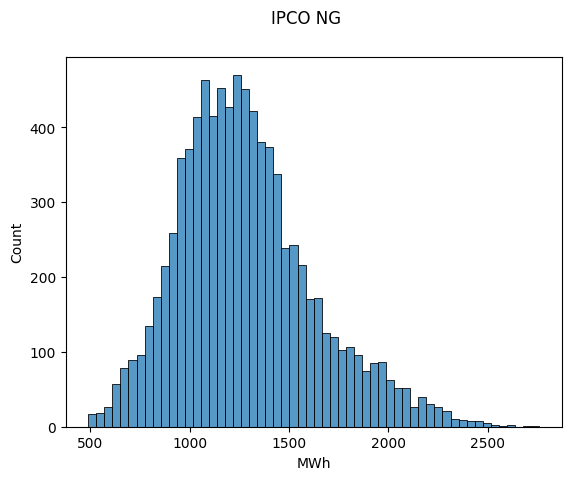

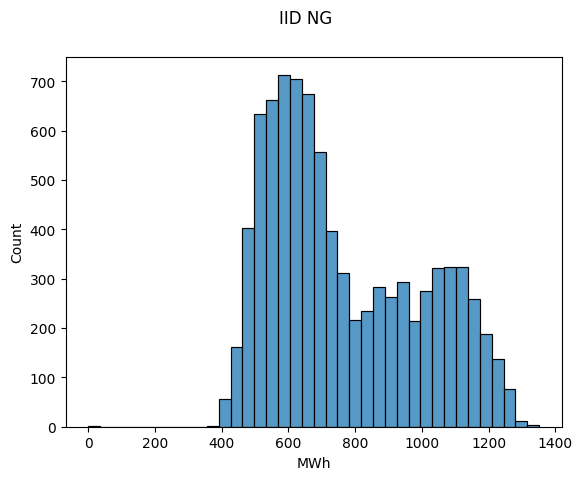

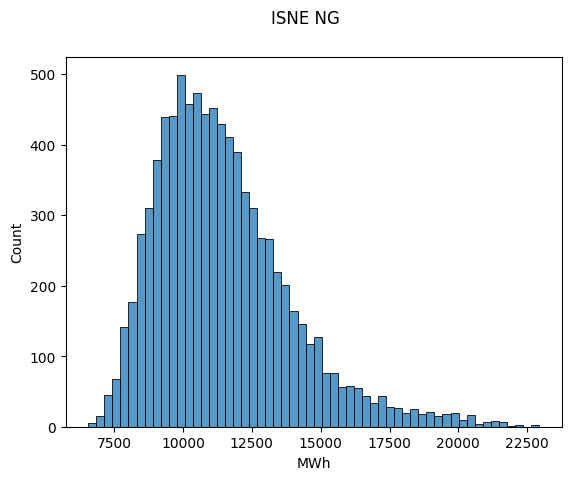

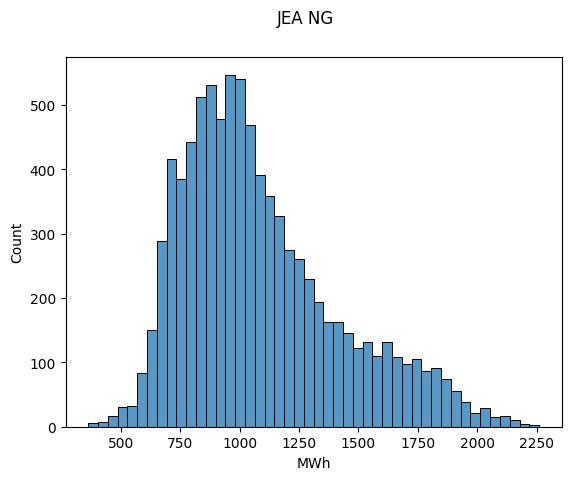

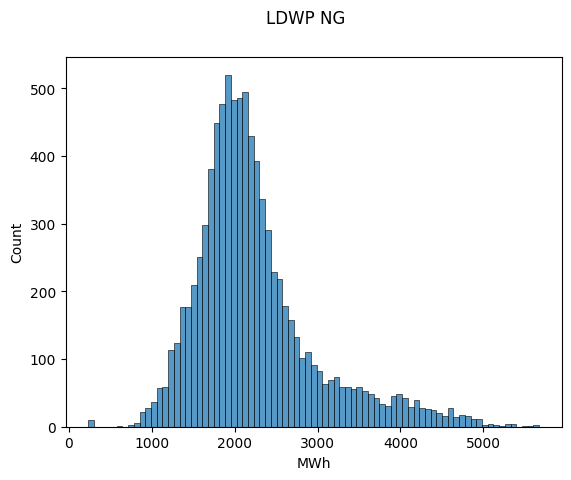

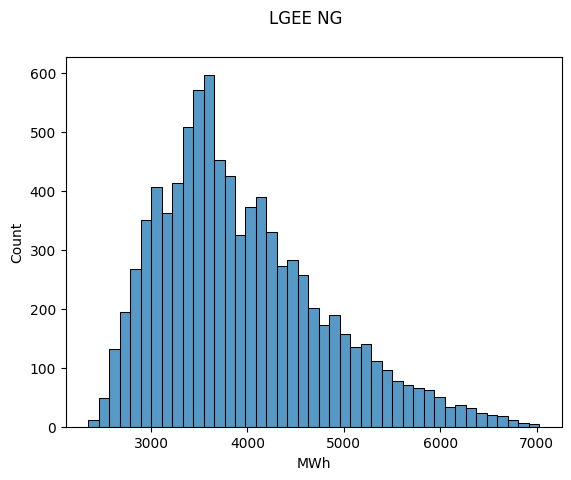

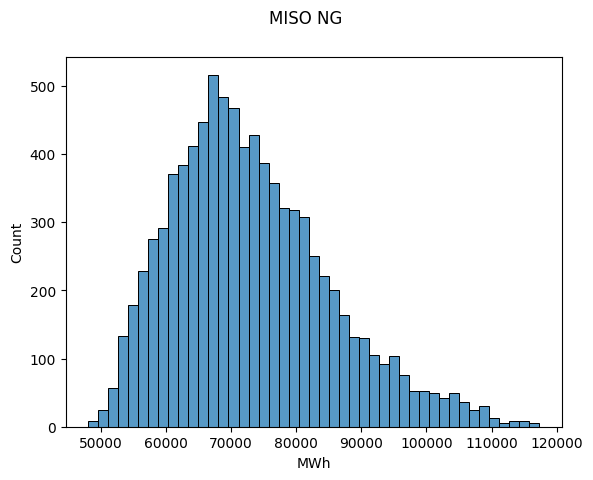

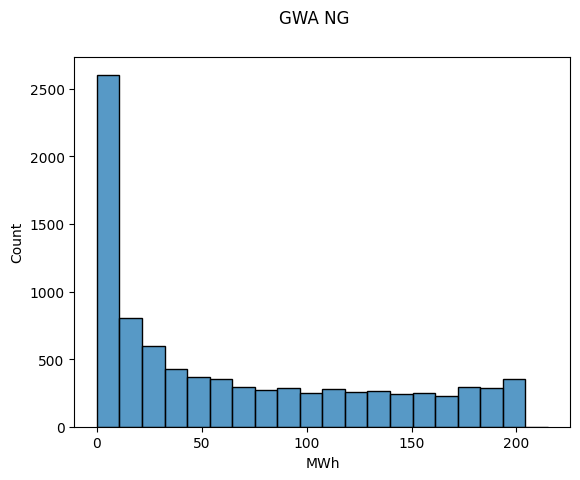

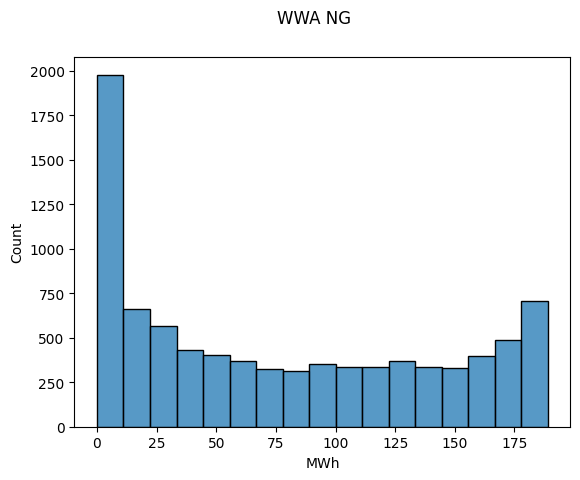

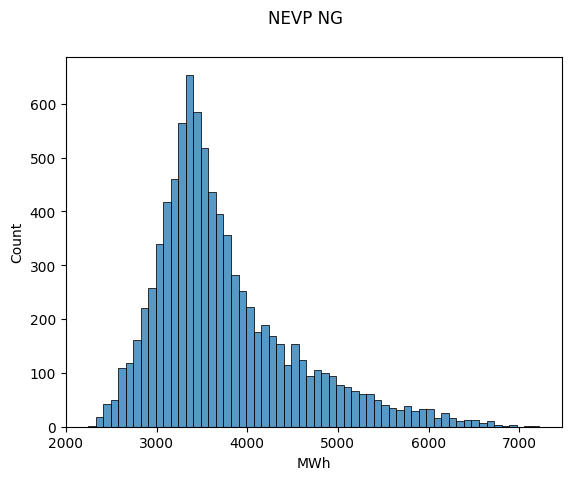

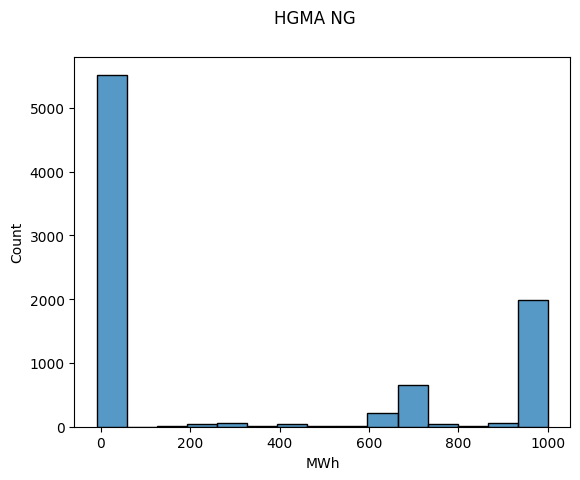

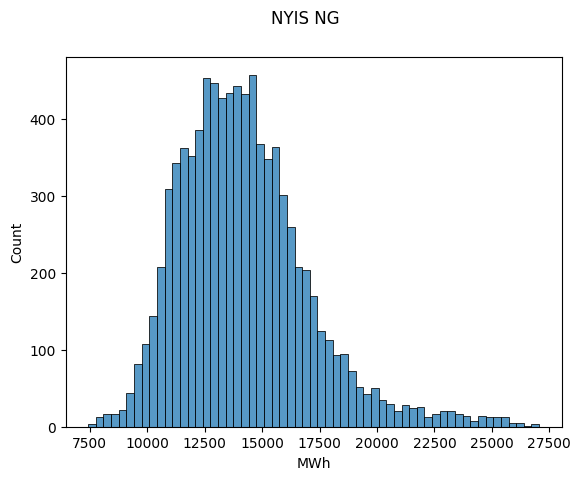

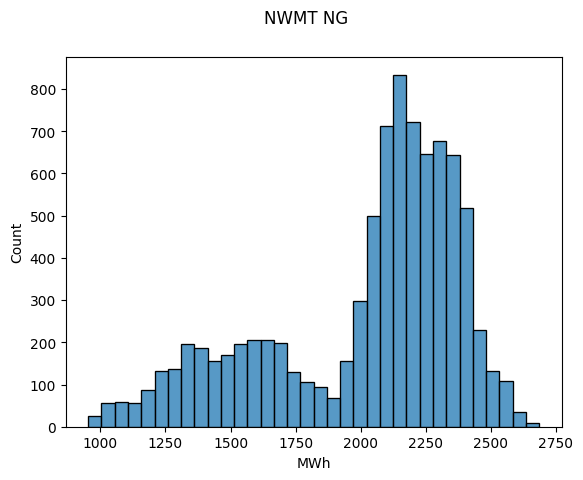

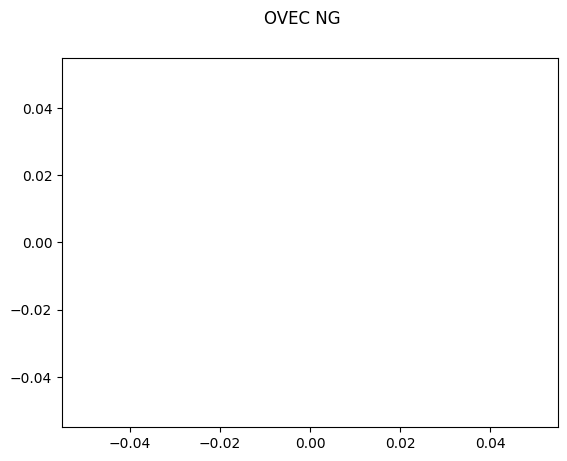

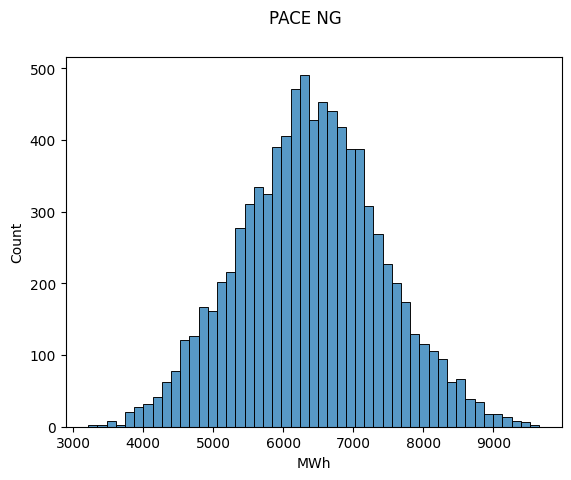

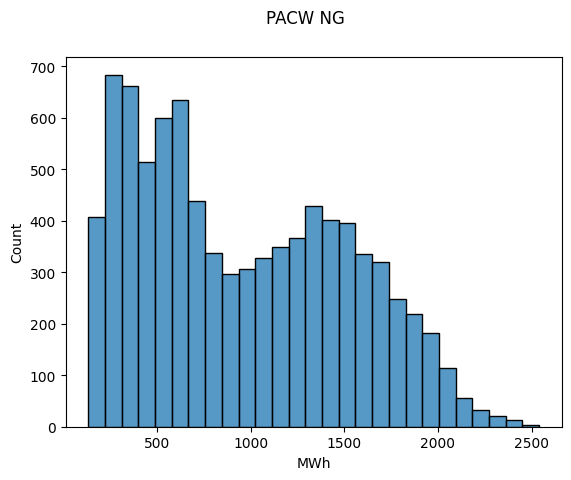

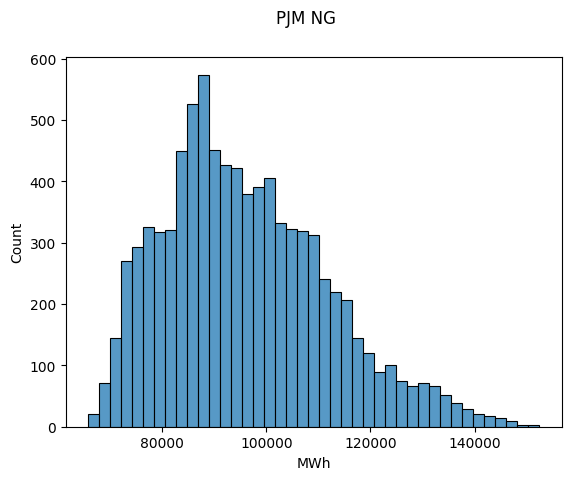

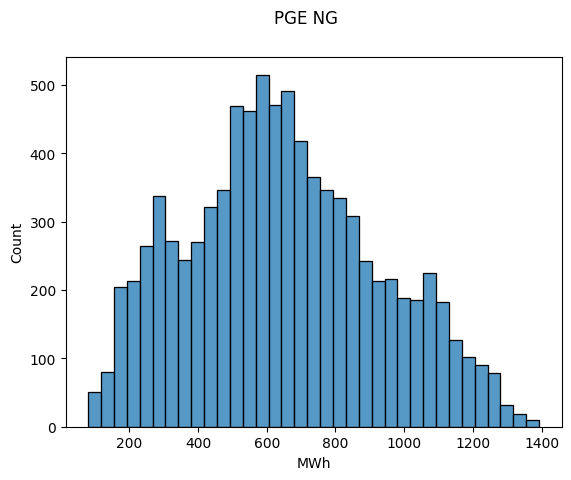

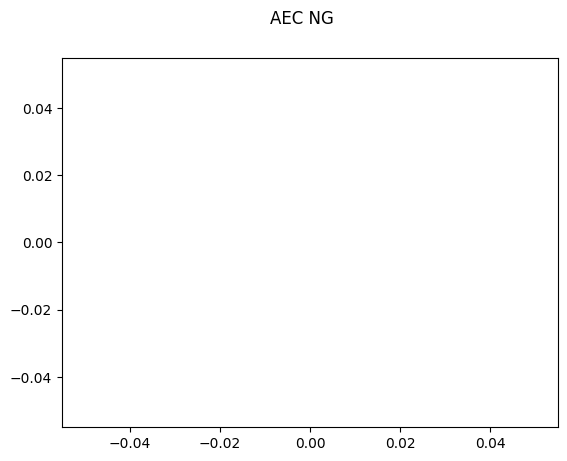

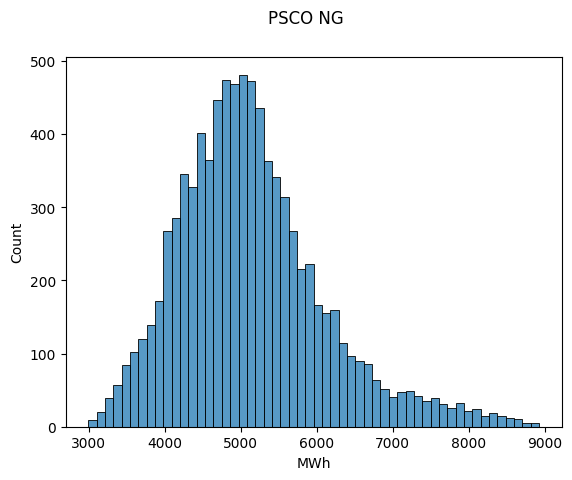

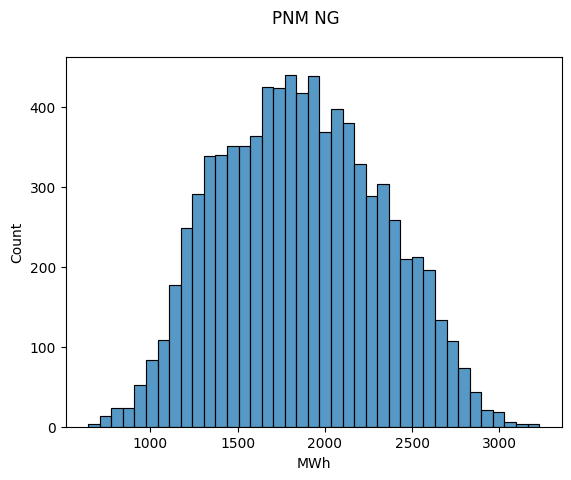

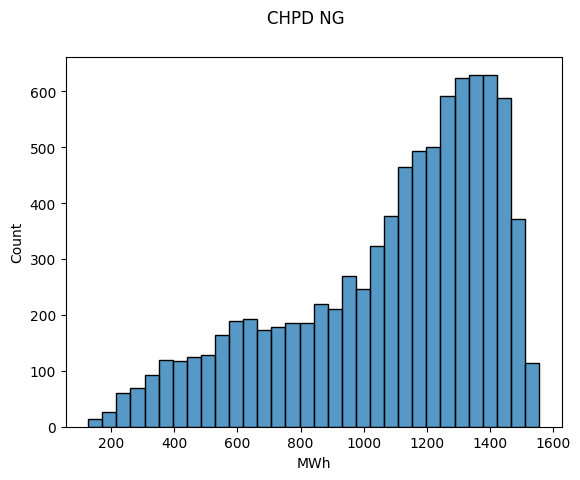

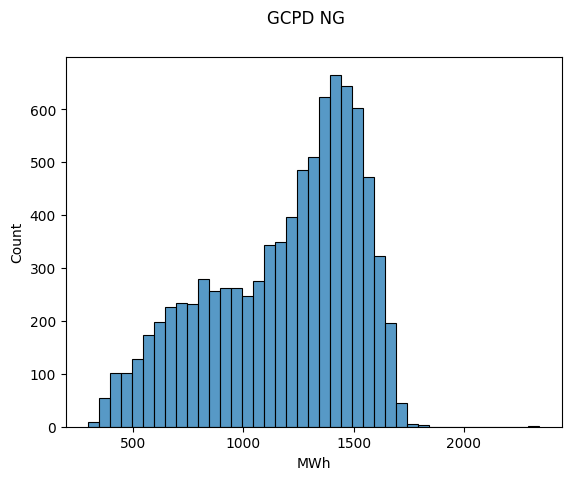

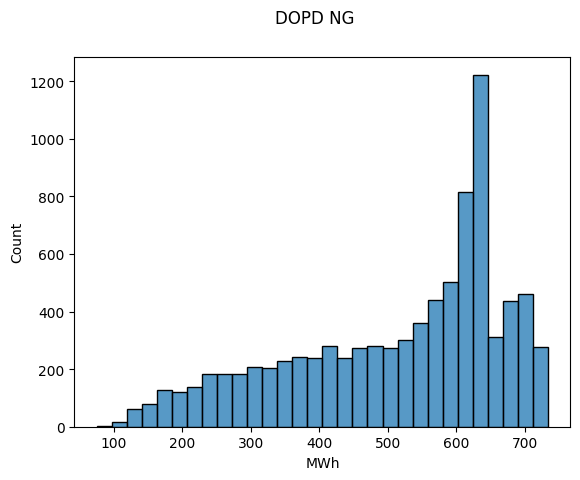

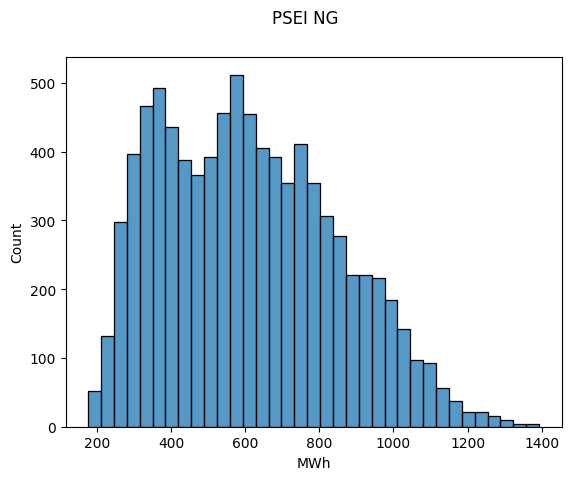

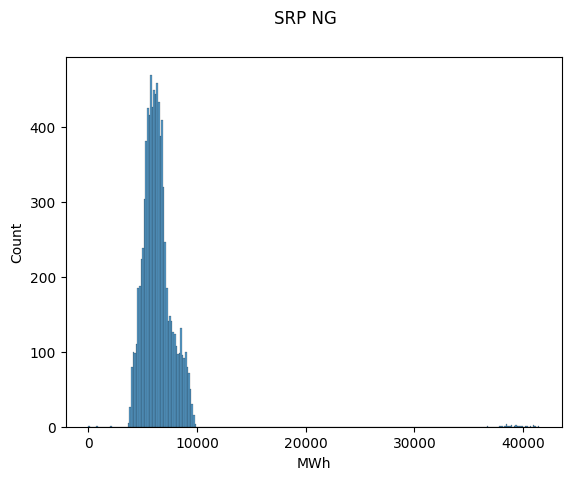

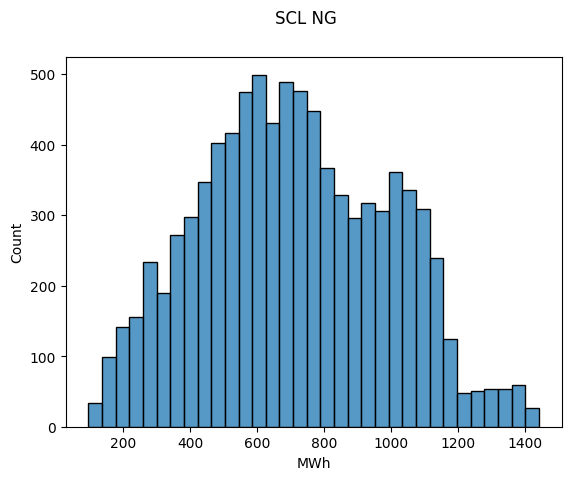

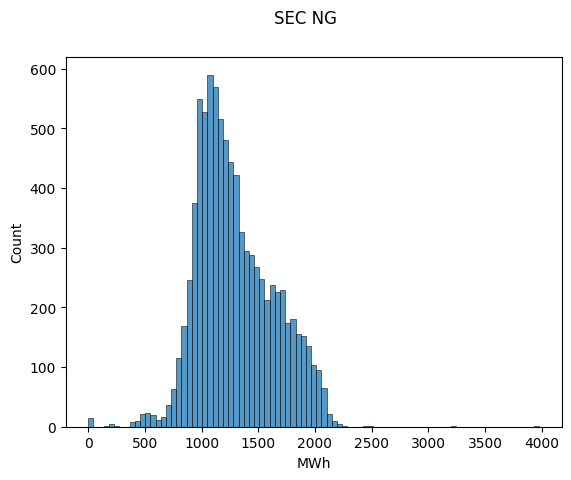

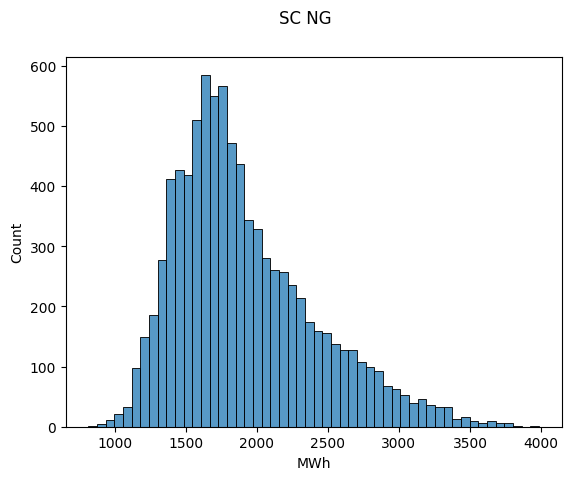

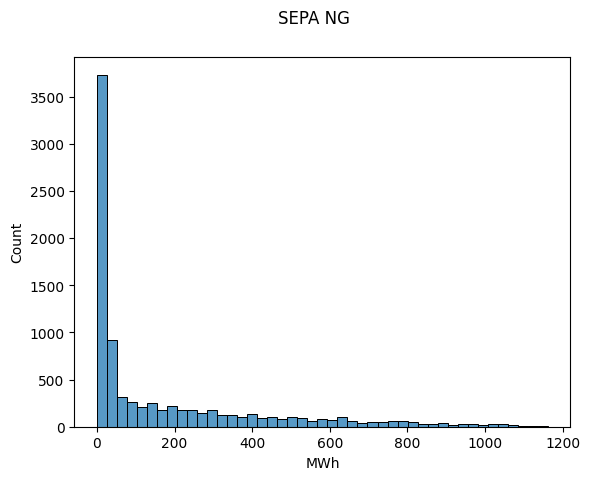

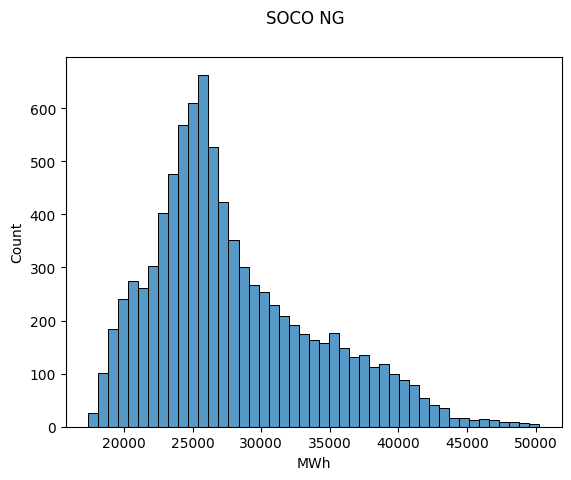

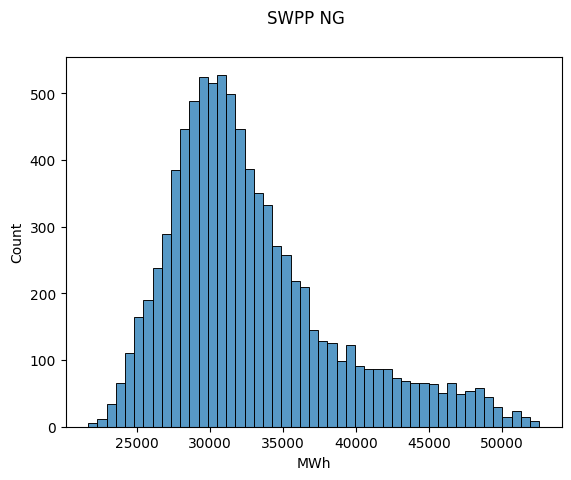

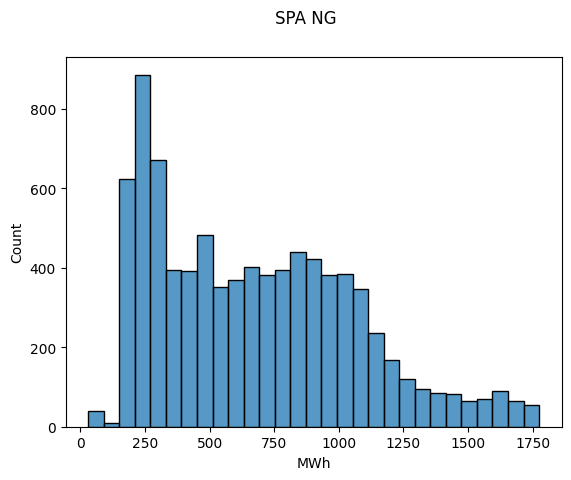

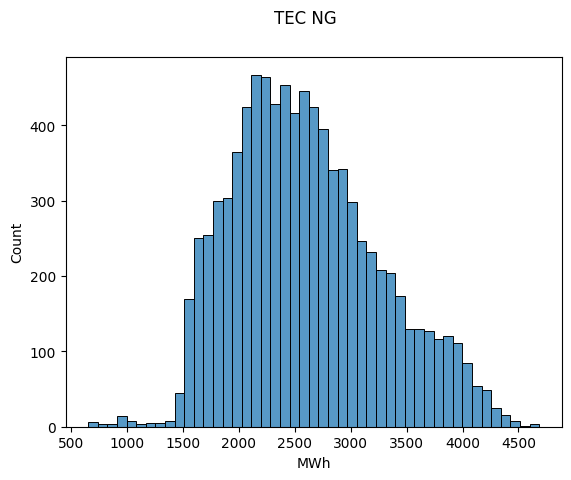

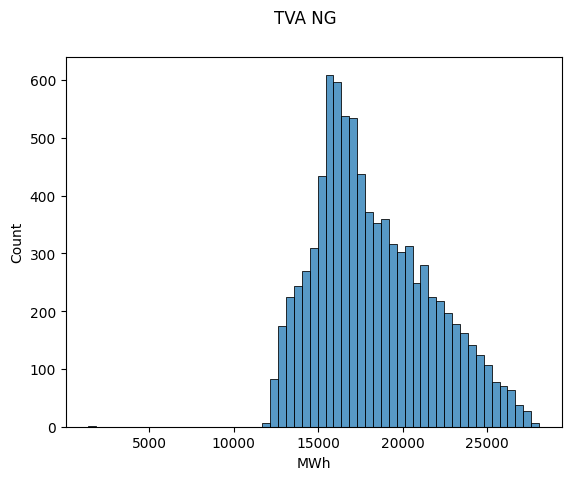

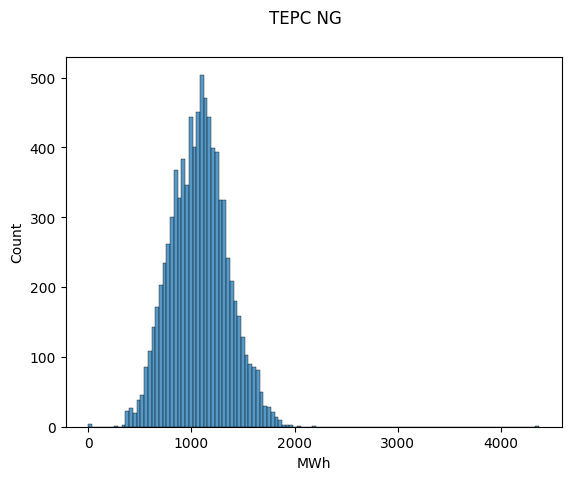

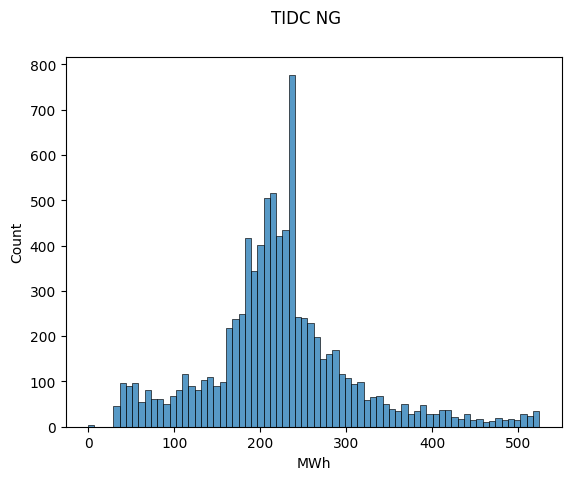

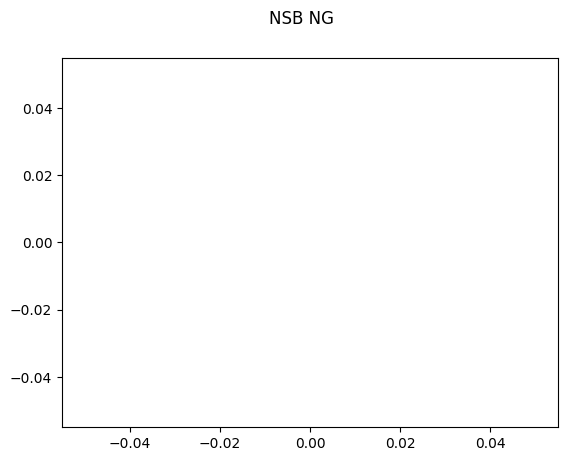

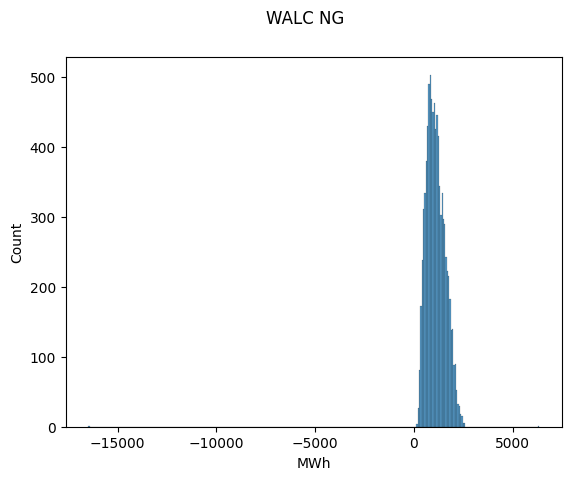

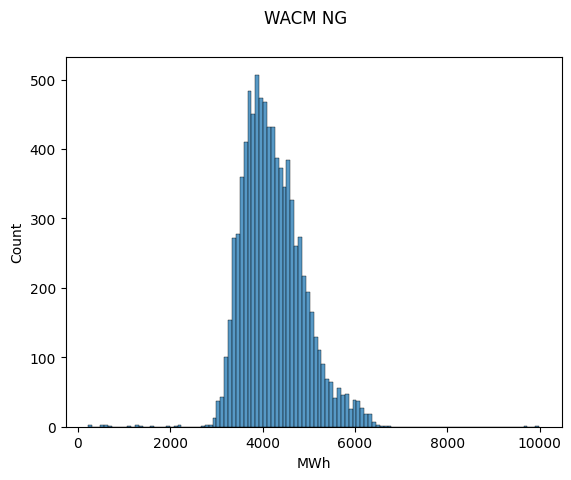

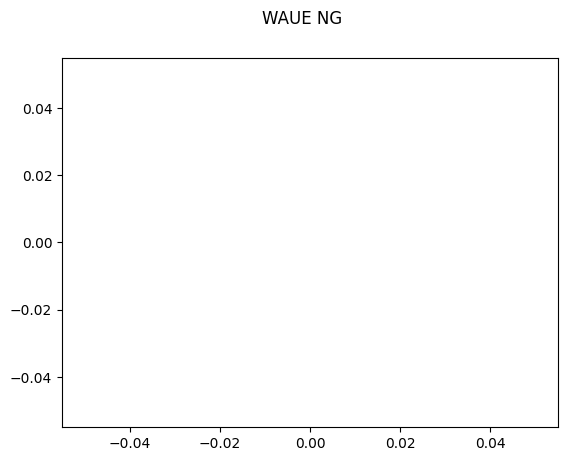

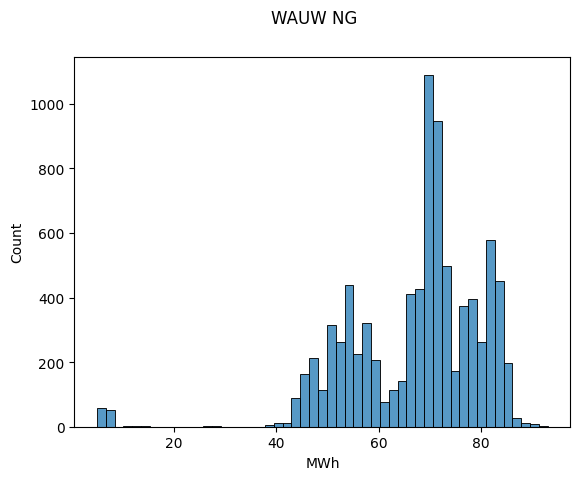

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

etype = 'NG'
p=0
for BA in BA_dict:
    fig=plt.figure(p)
    fig.suptitle(f"{BA} {etype}")
    sns.histplot(data=BA_dict[BA][etype], x='MWh')
    plt.show()
    p += 1

<Axes: xlabel='period'>

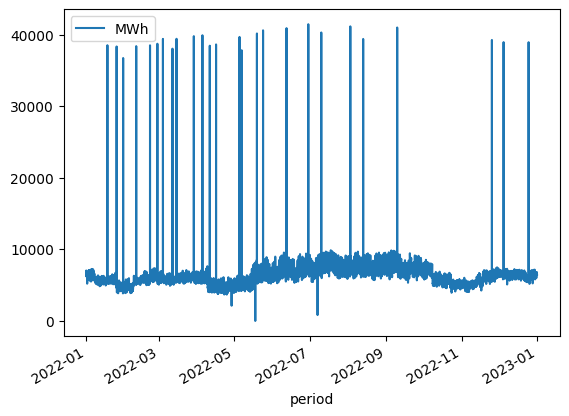

In [109]:
BA_dict['SRP']['NG'].plot()

<Axes: xlabel='period'>

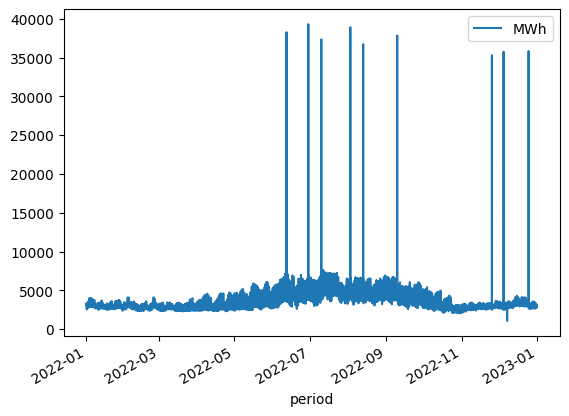

In [111]:
BA_dict['SRP']['D'].plot()

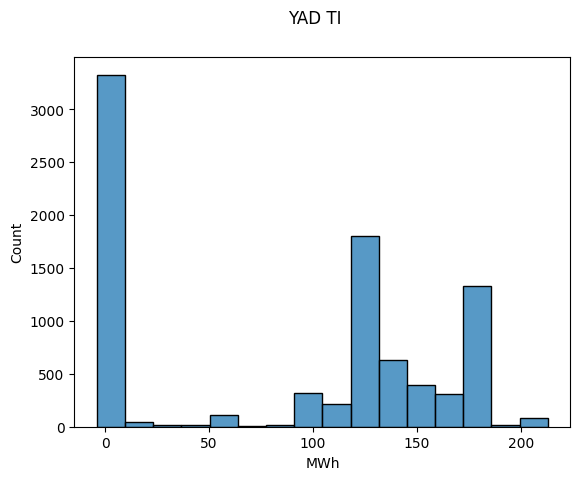

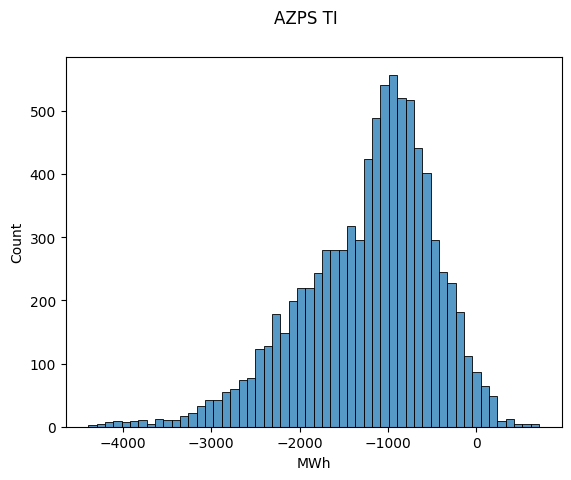

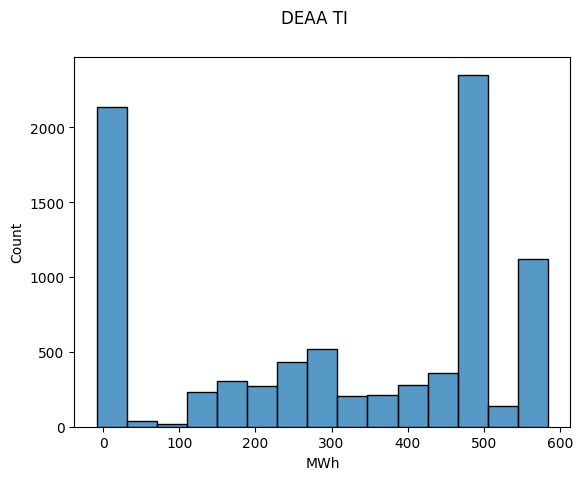

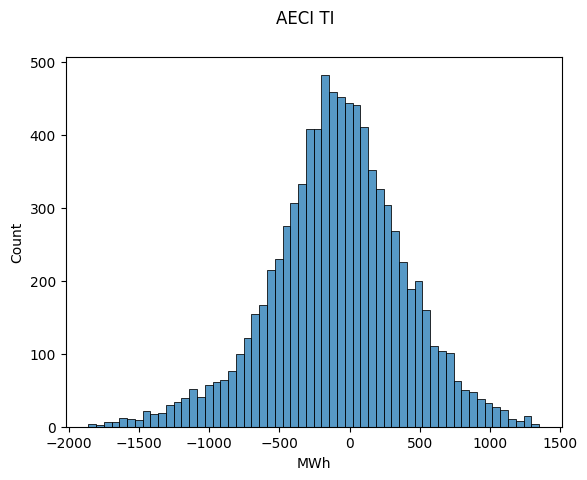

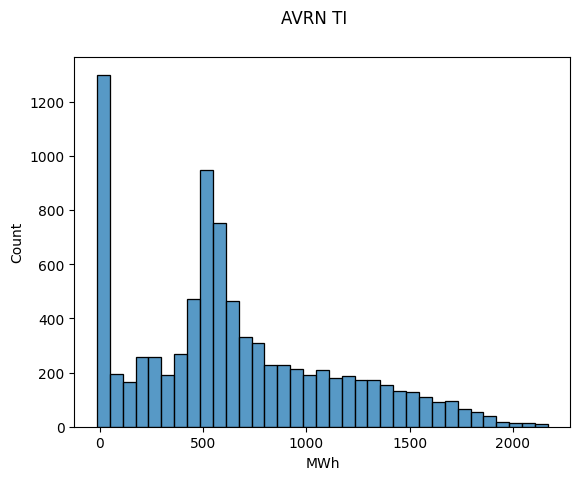

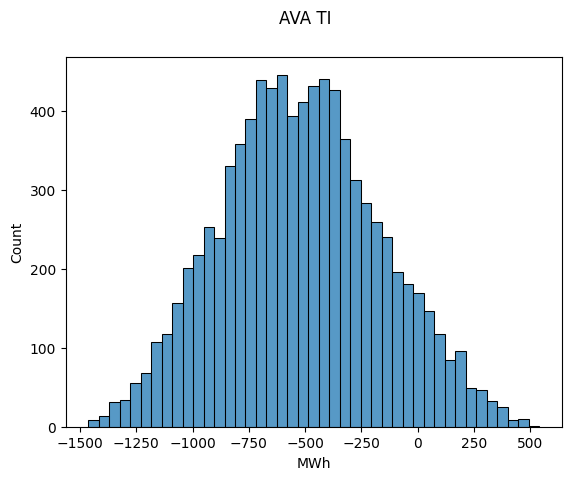

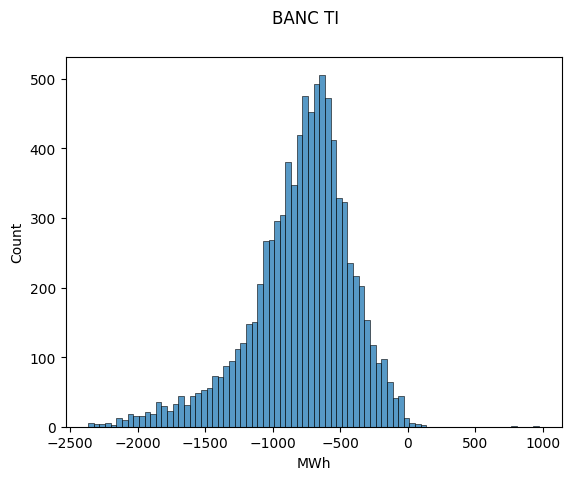

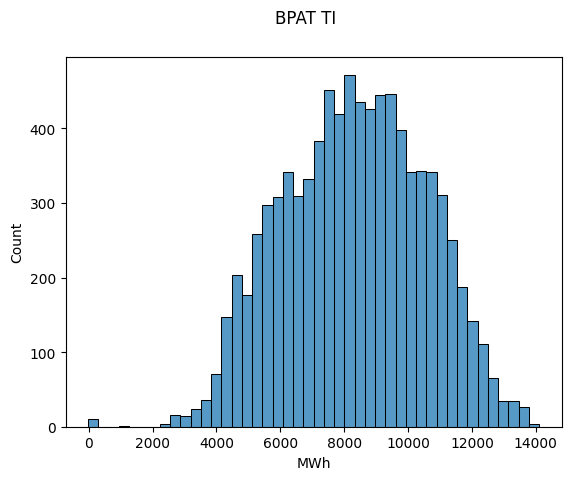

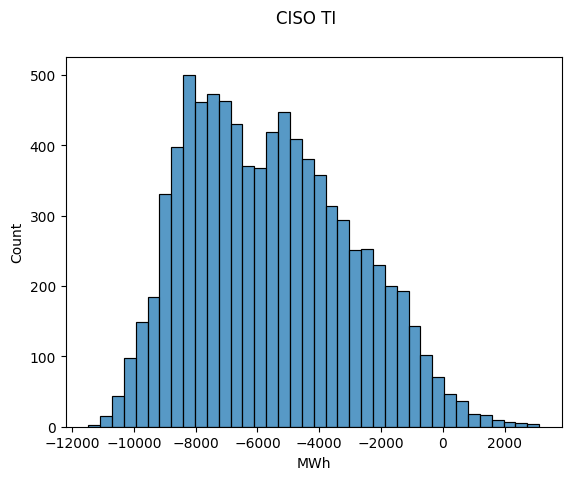

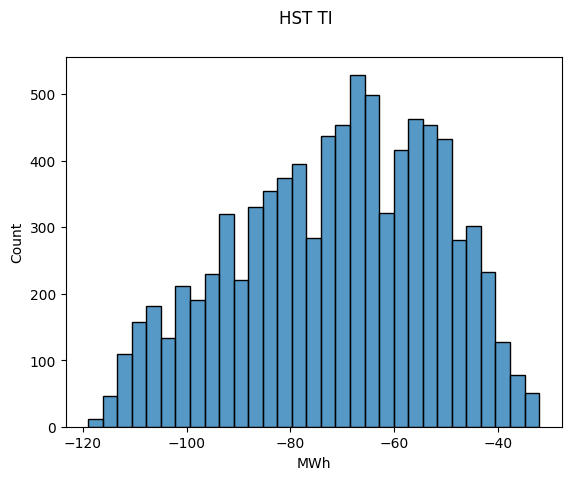

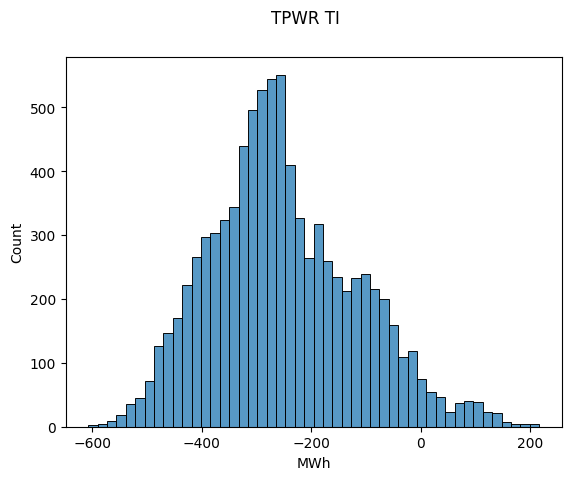

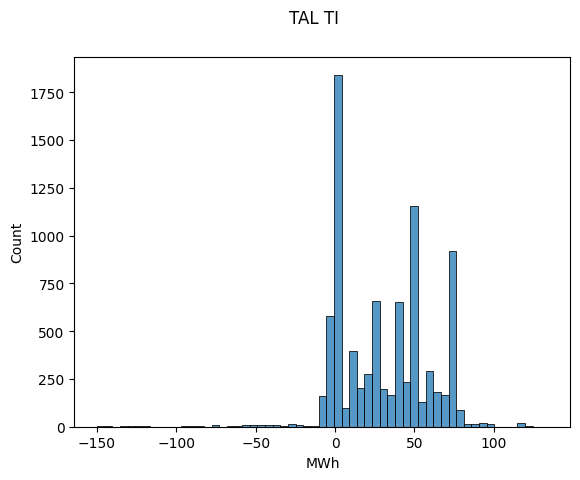

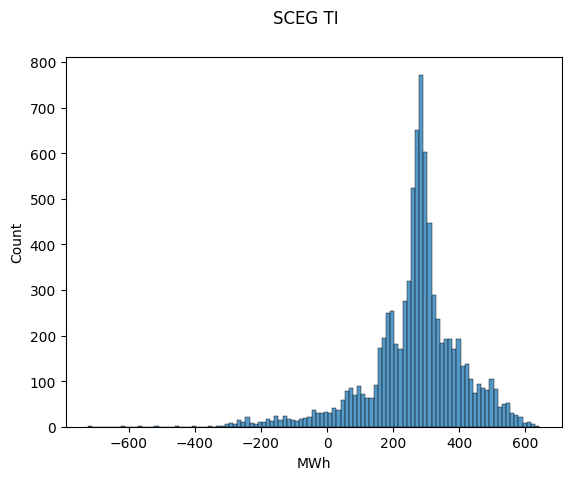

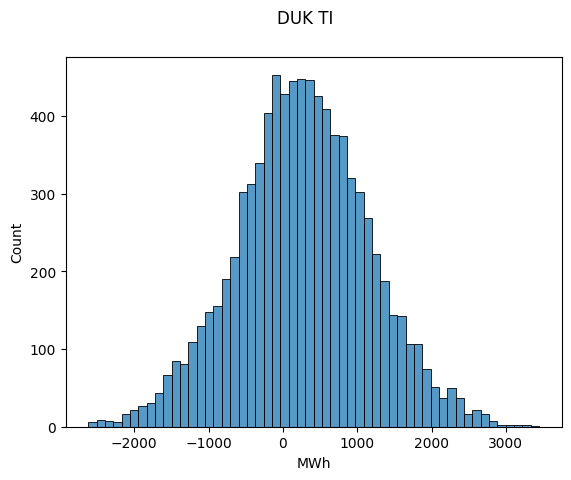

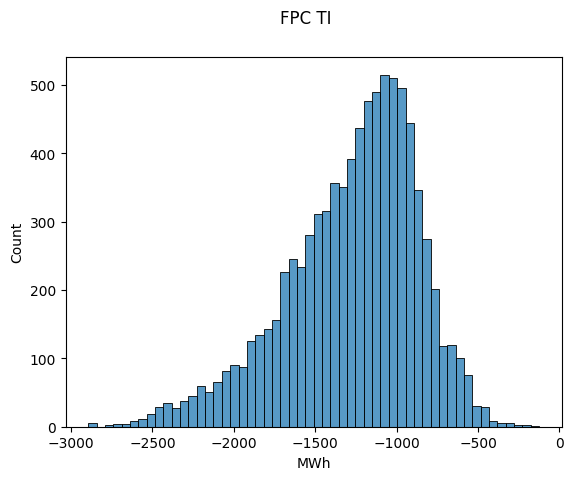

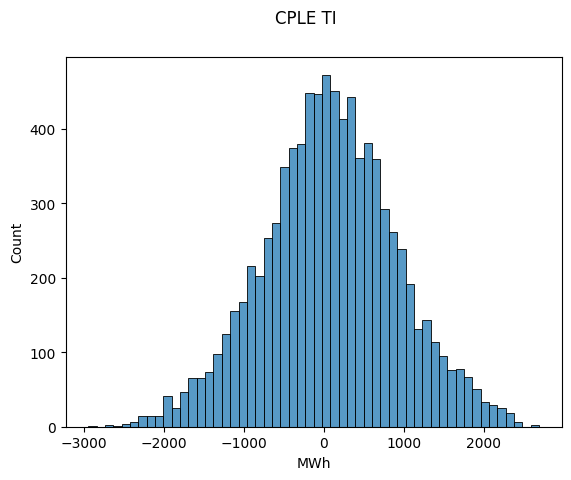

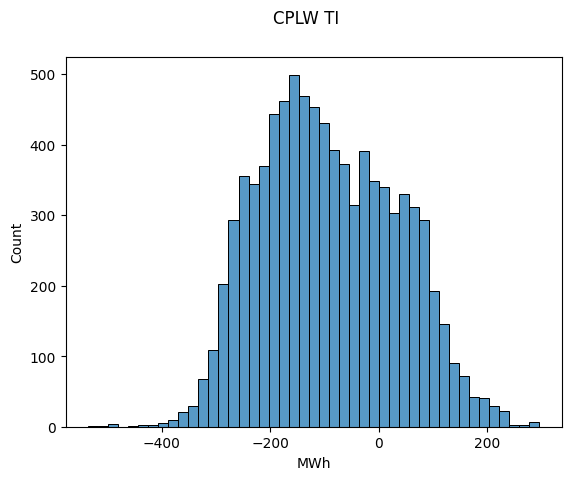

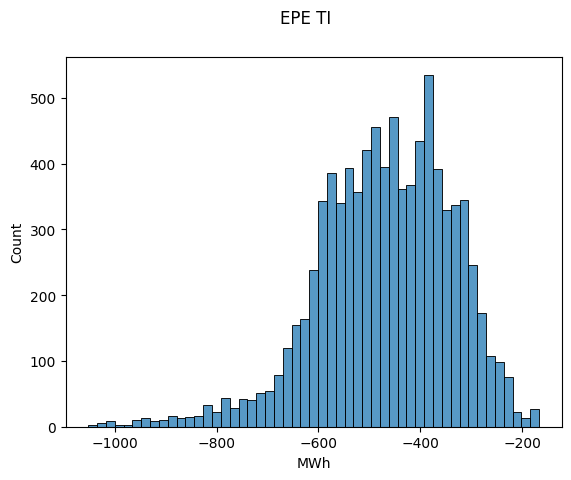

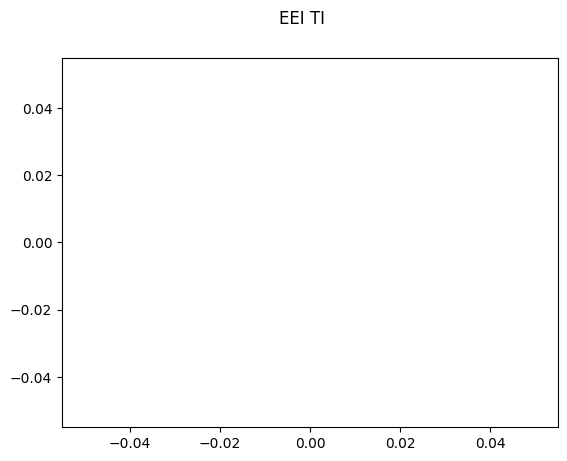

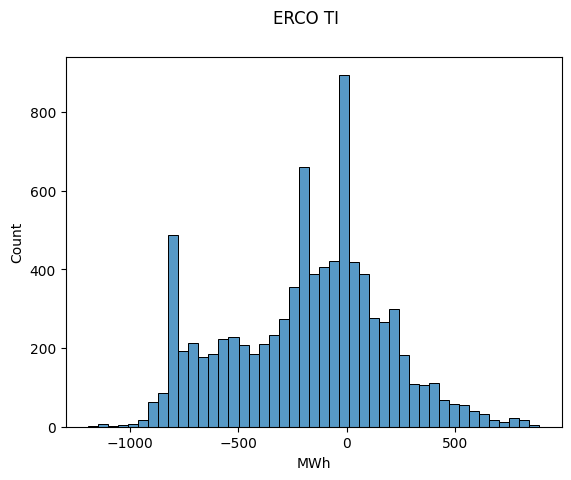

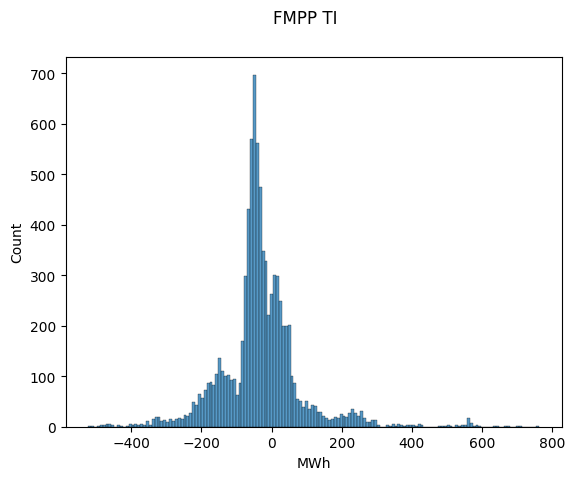

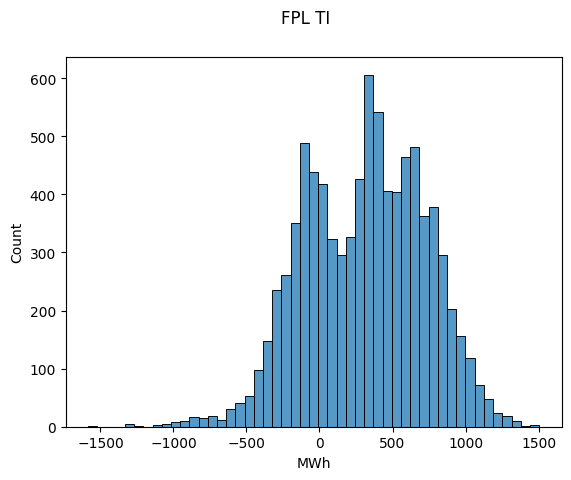

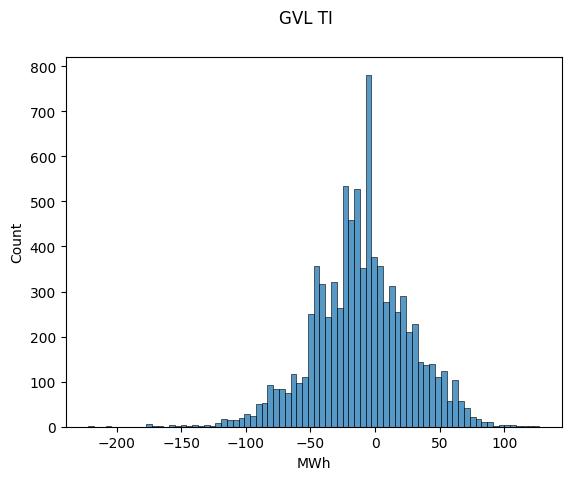

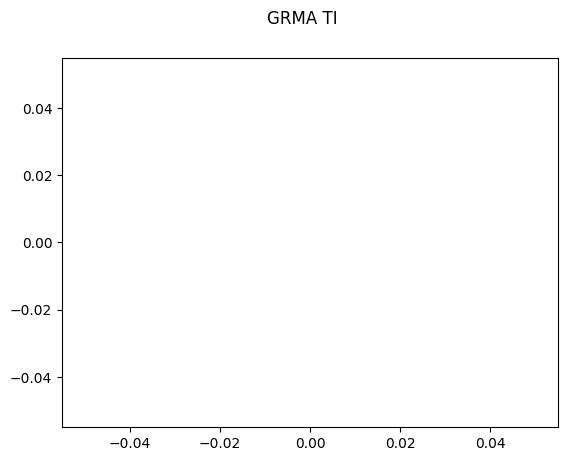

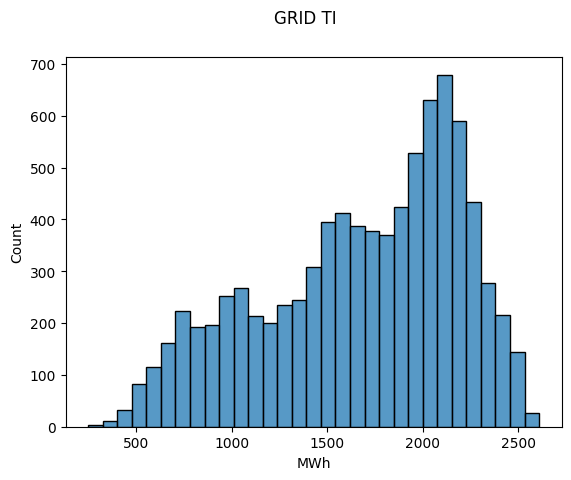

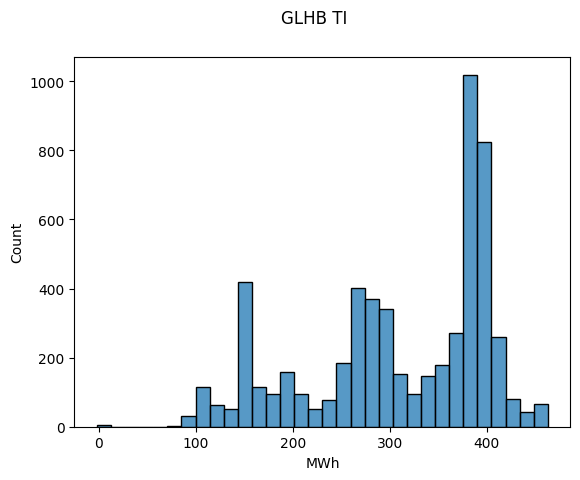

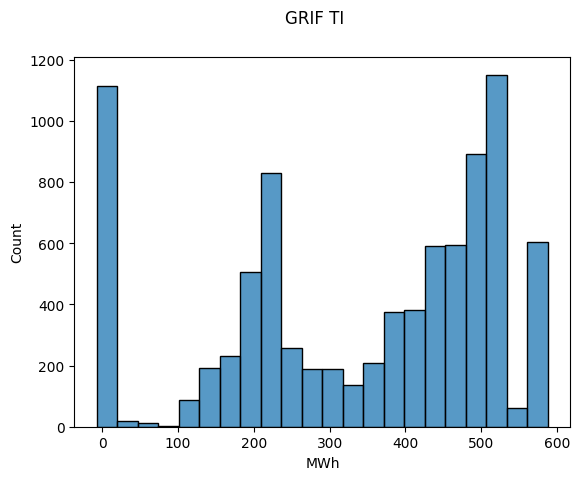

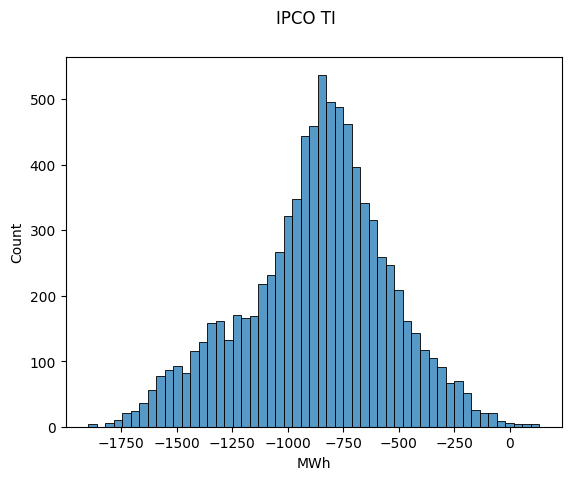

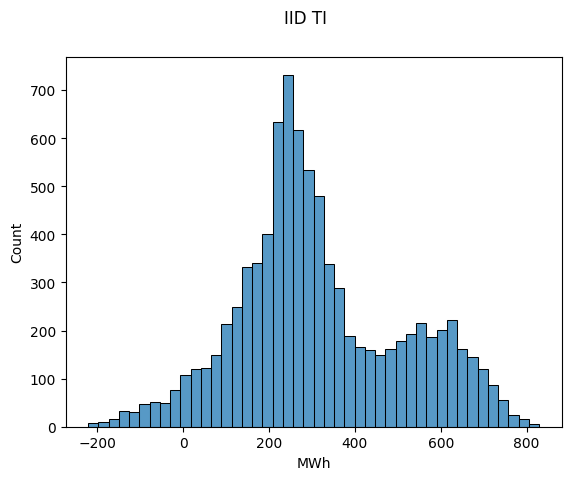

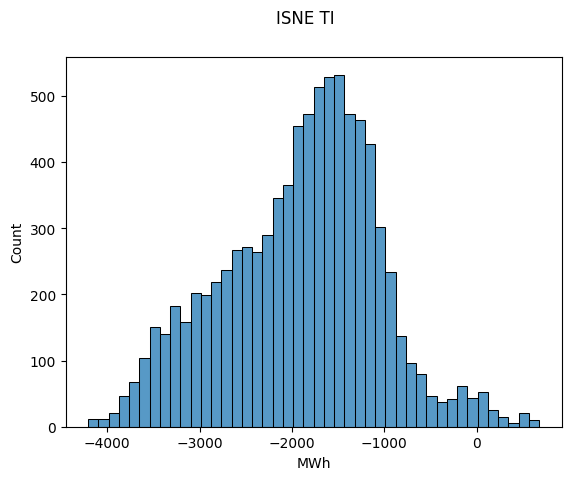

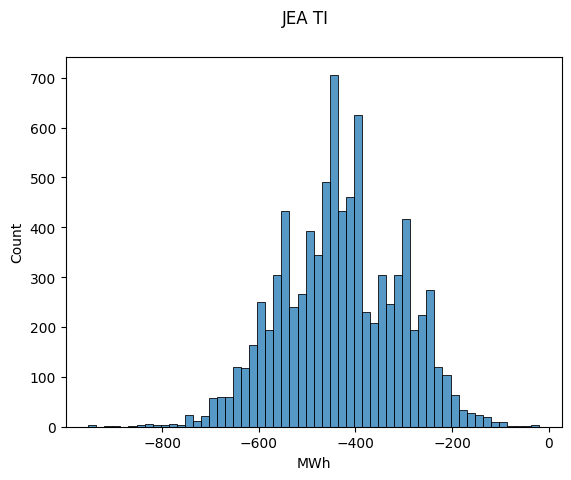

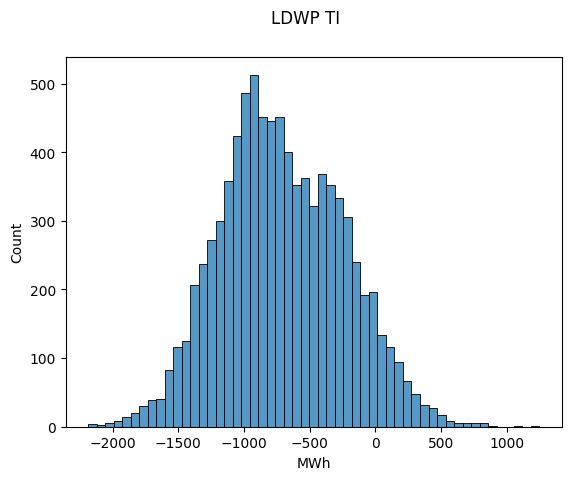

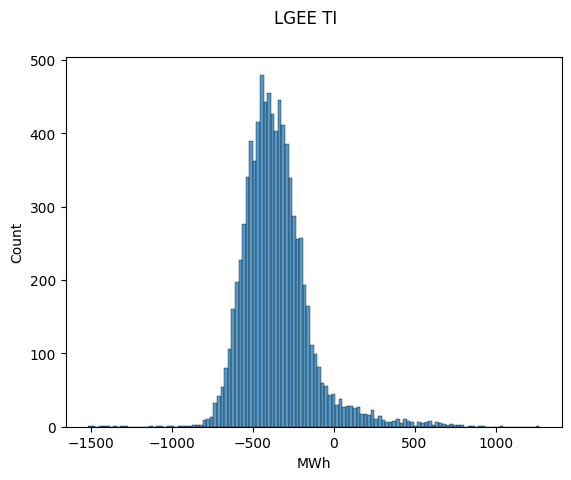

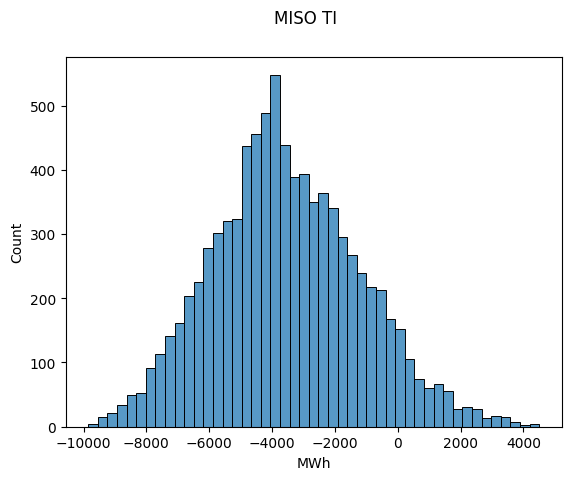

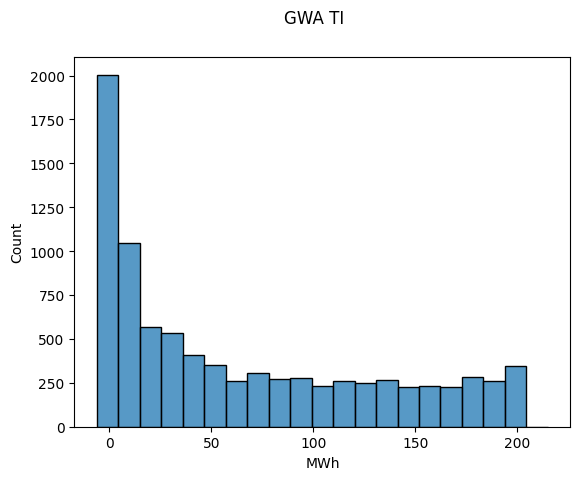

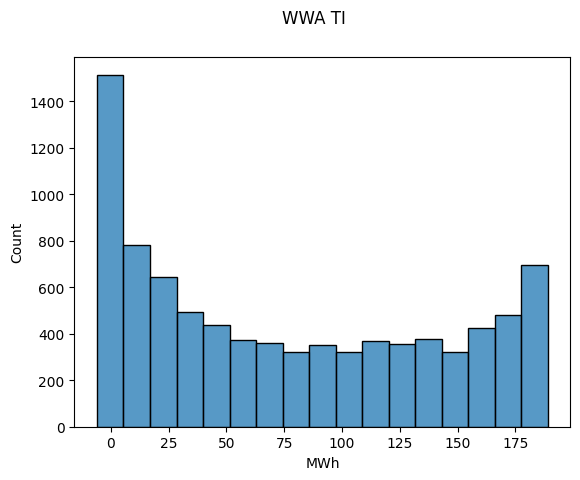

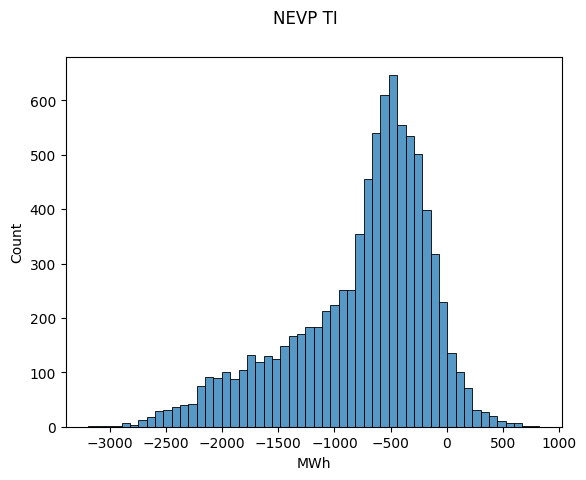

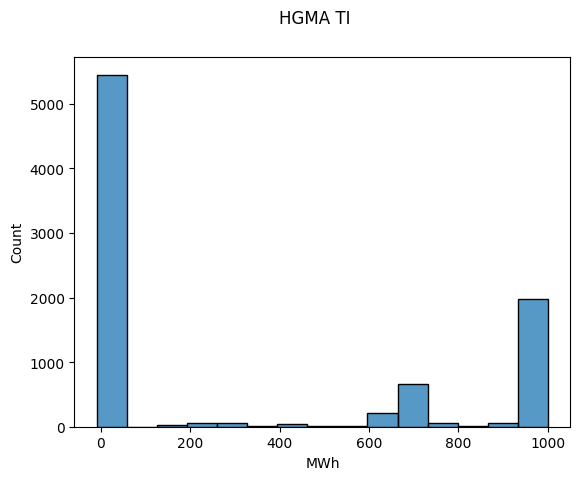

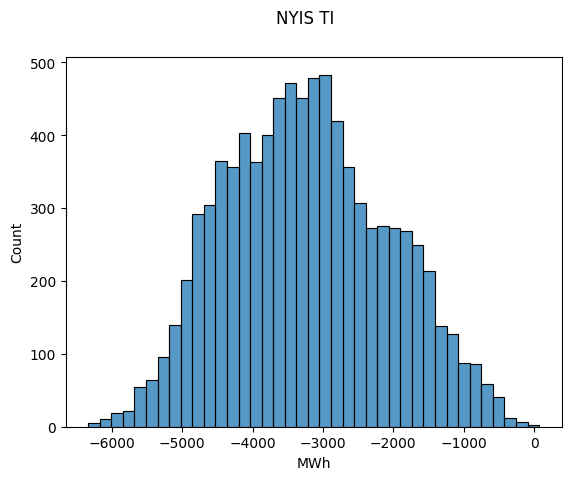

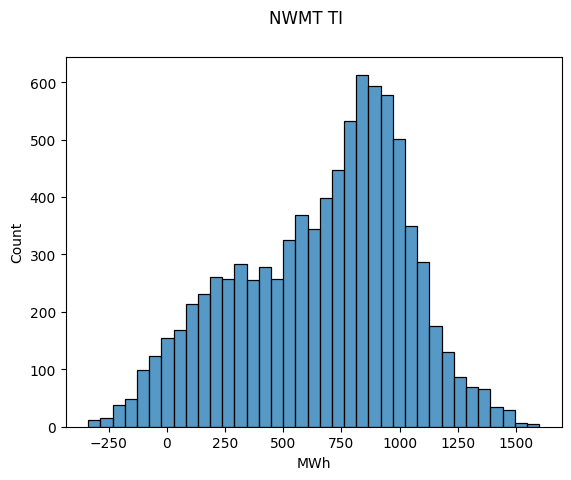

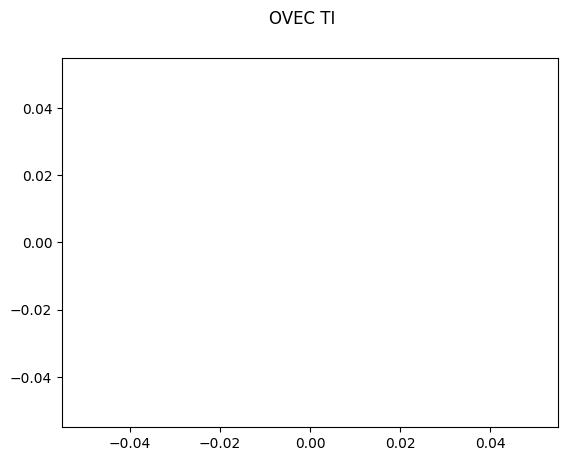

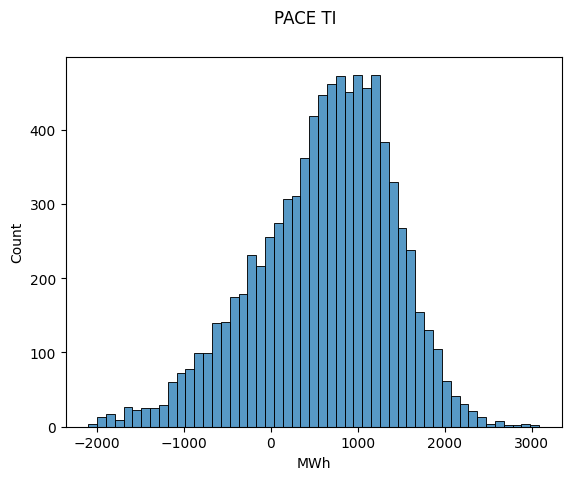

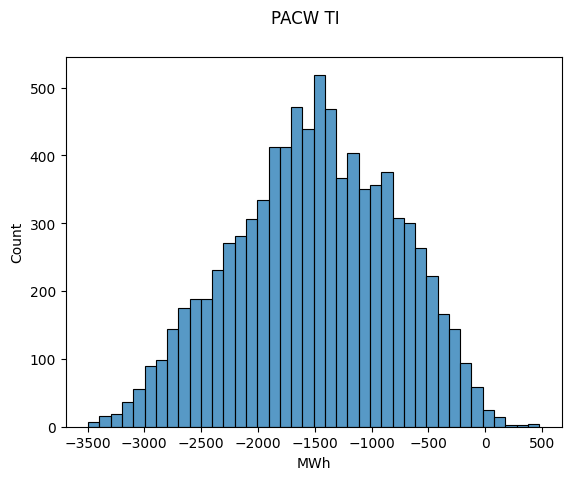

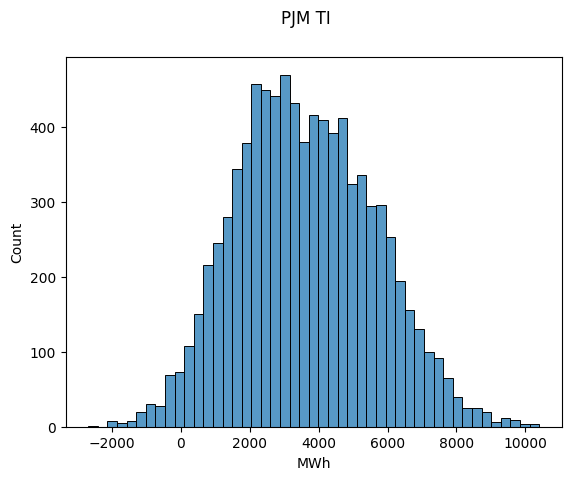

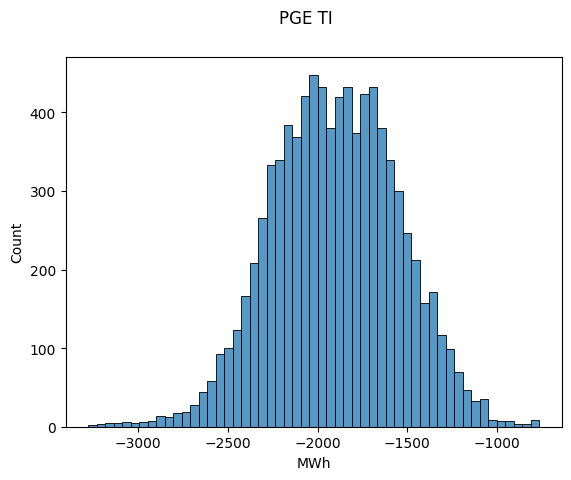

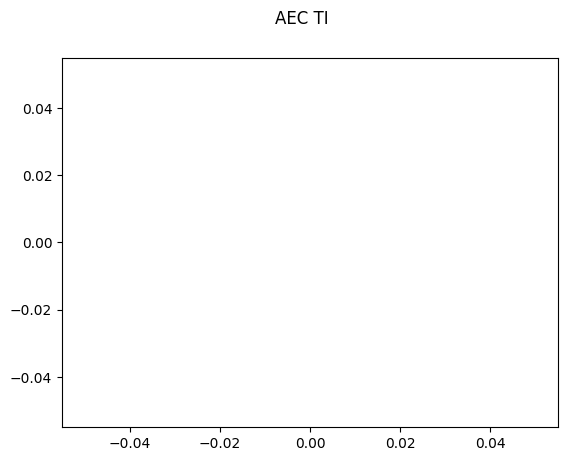

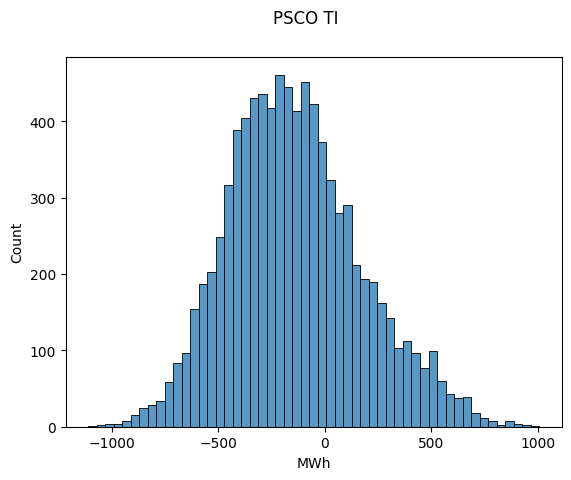

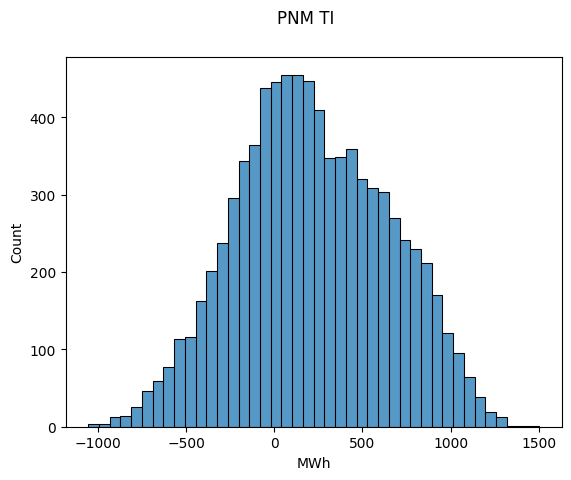

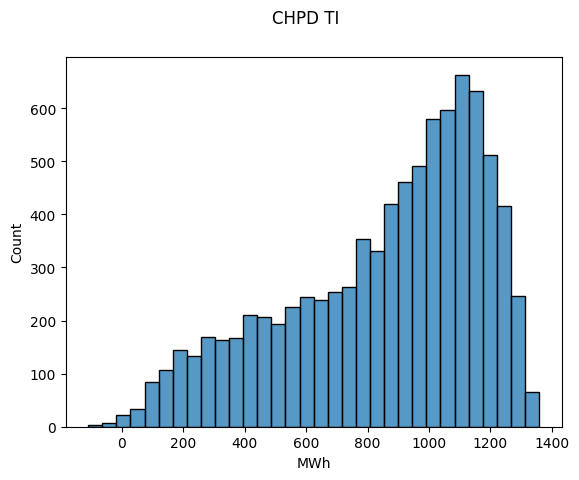

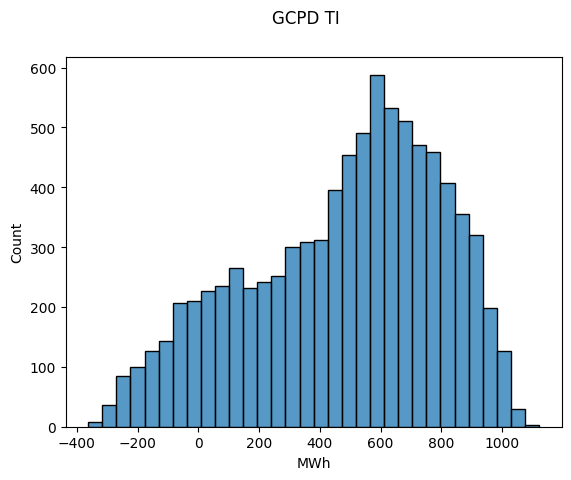

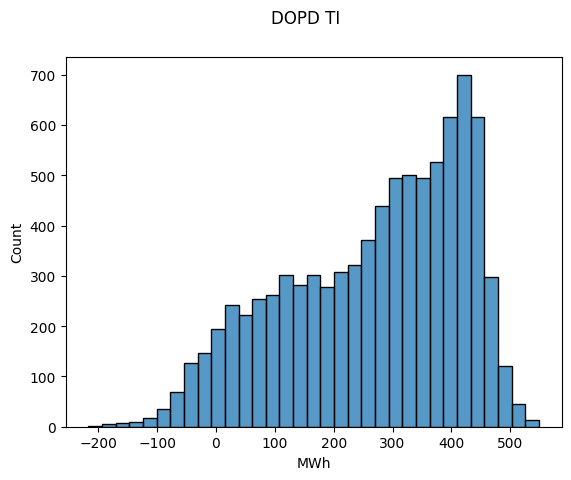

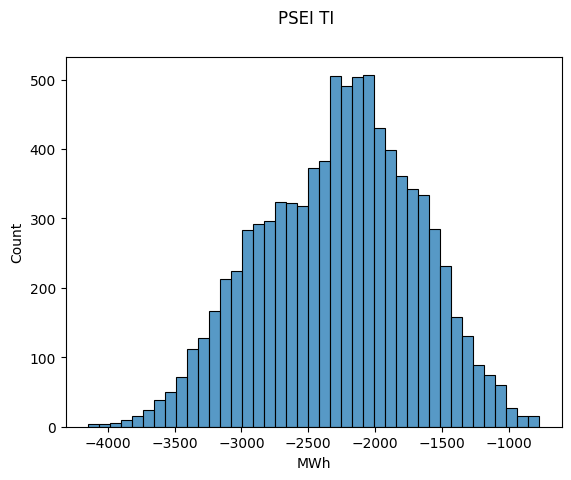

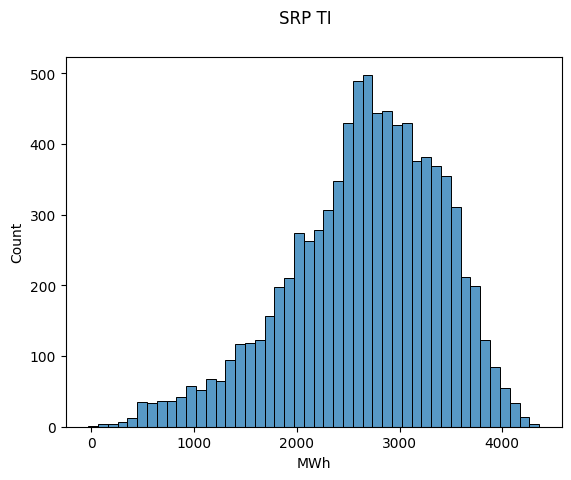

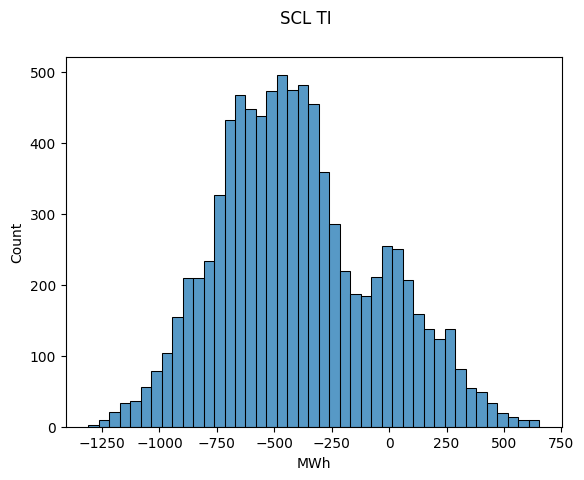

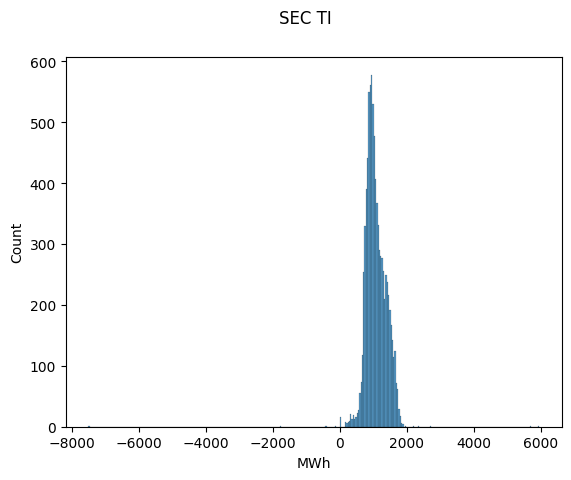

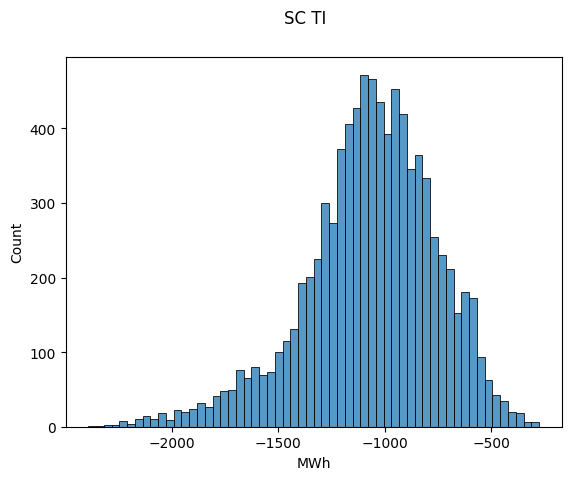

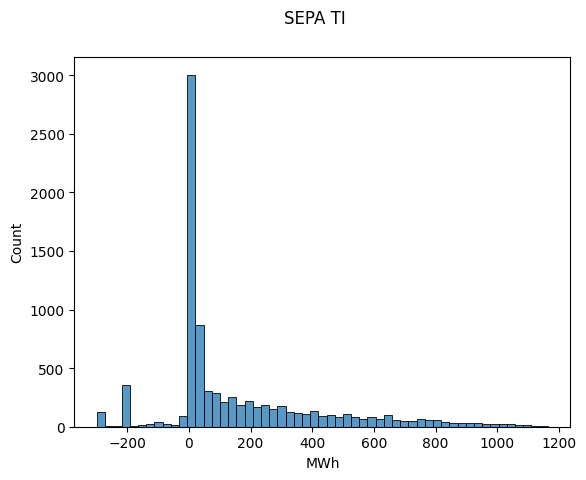

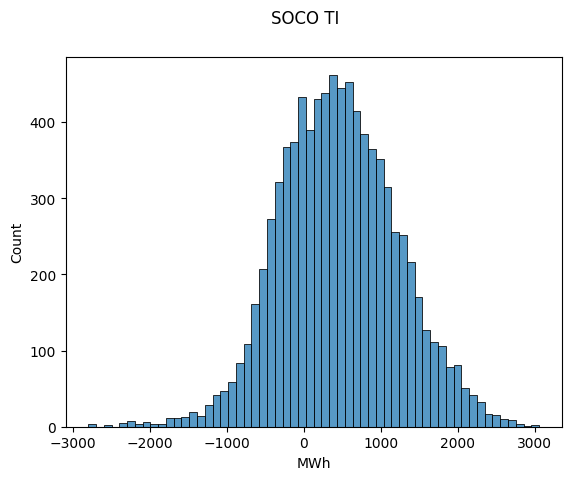

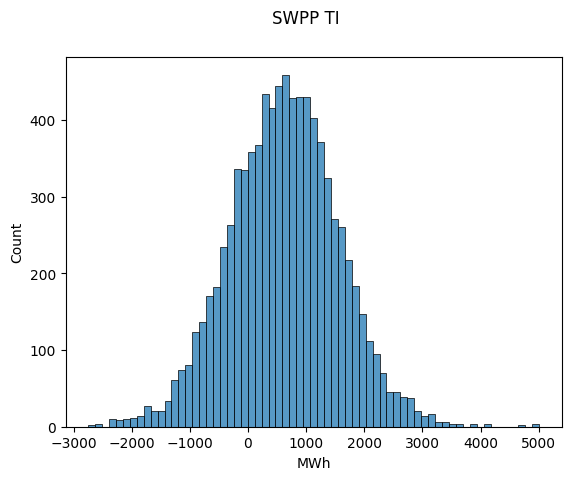

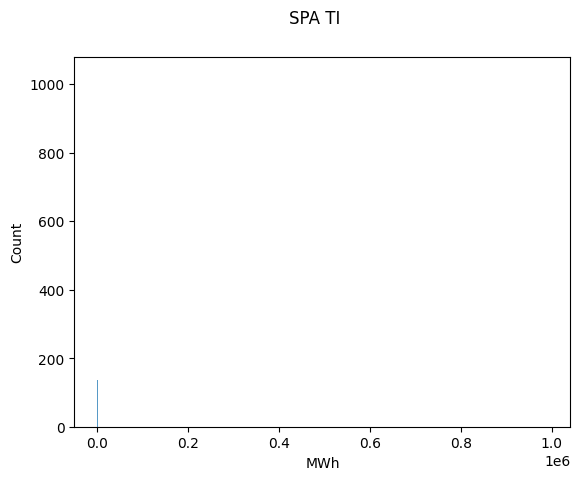

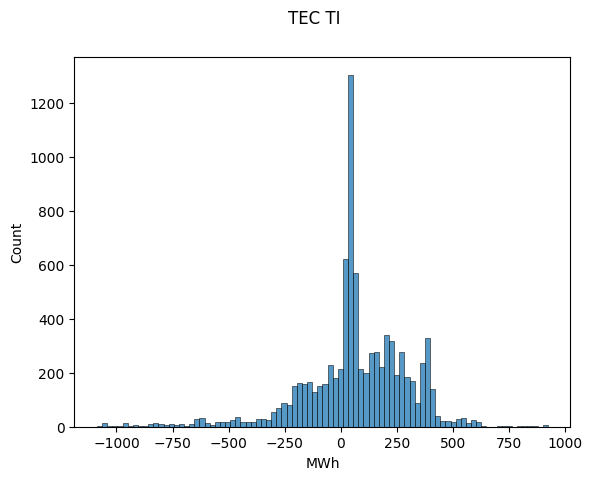

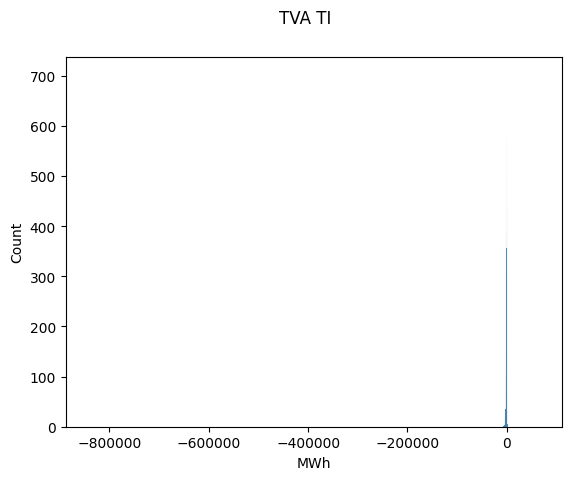

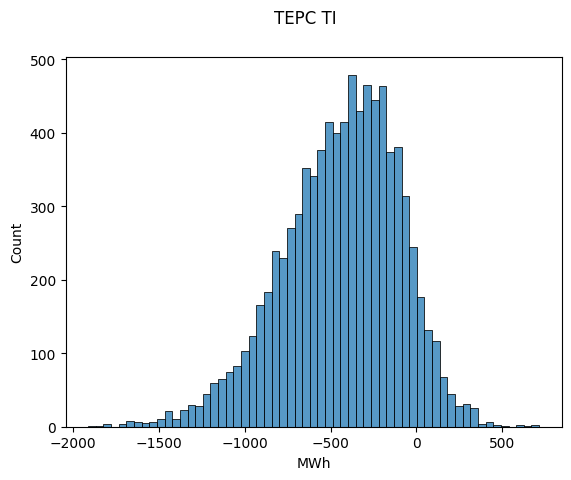

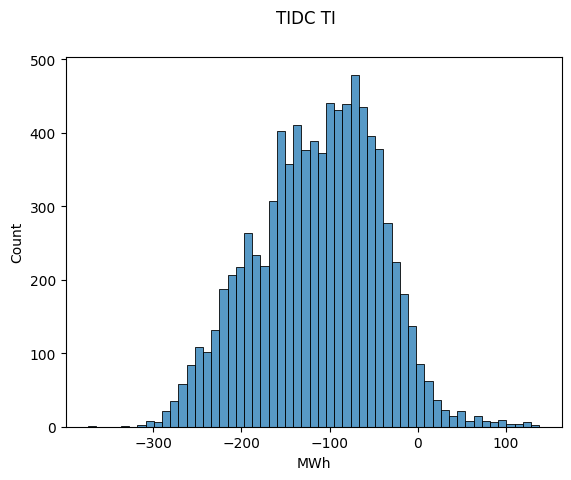

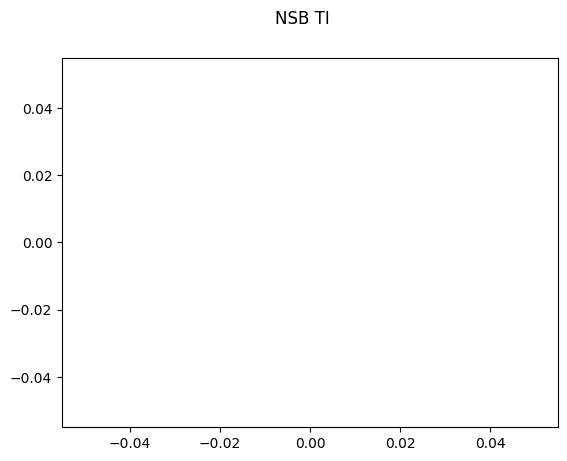

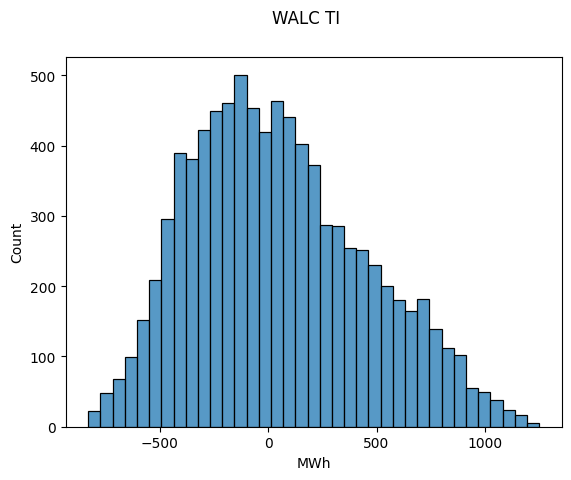

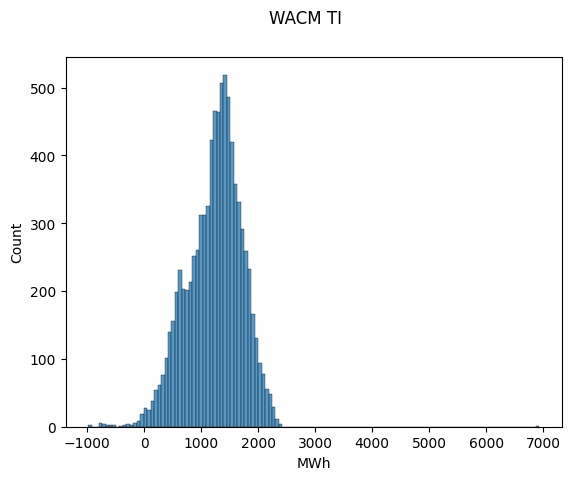

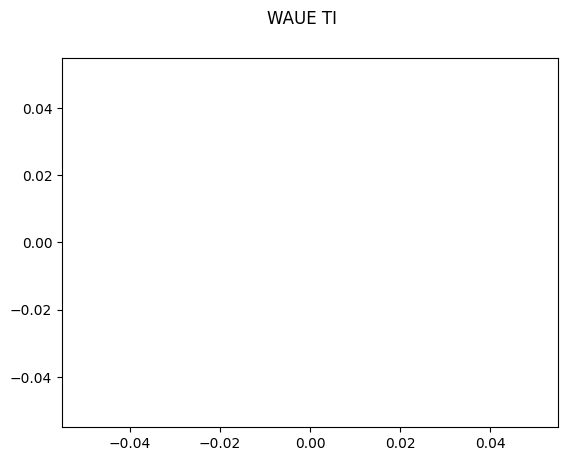

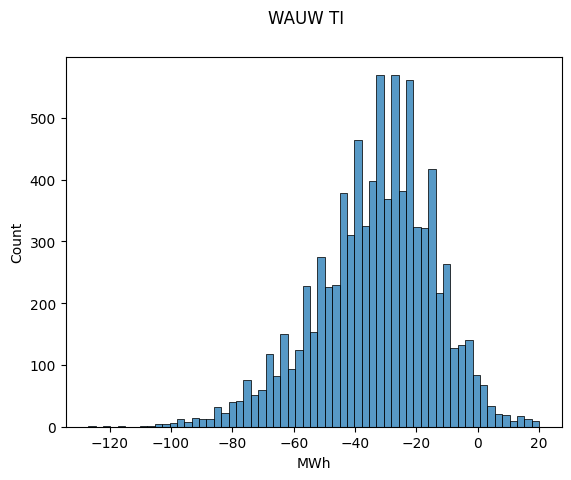

In [112]:
etype = 'TI'
p=0
for BA in BA_dict:
    fig=plt.figure(p)
    fig.suptitle(f"{BA} {etype}")
    sns.histplot(data=BA_dict[BA][etype], x='MWh')
    plt.show()
    p += 1

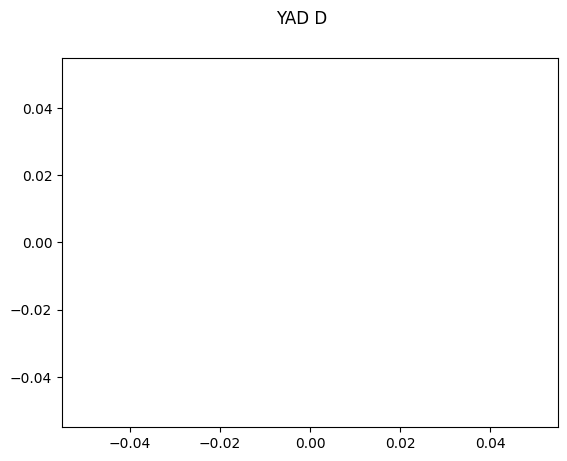

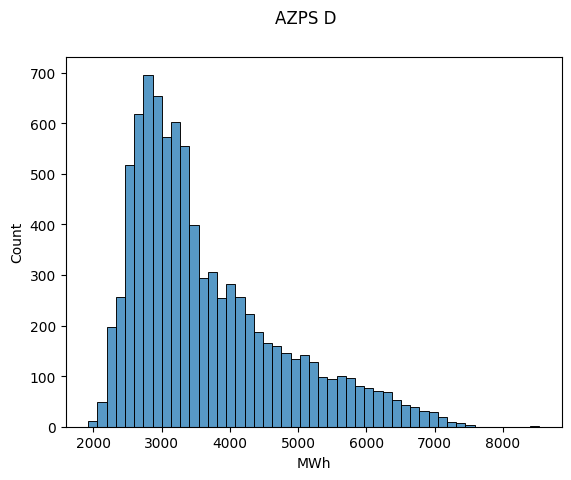

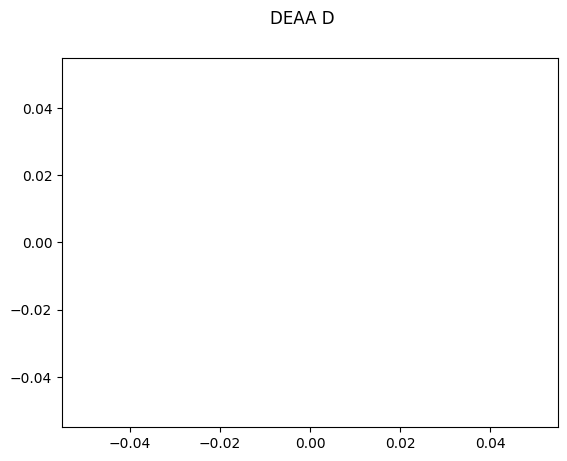

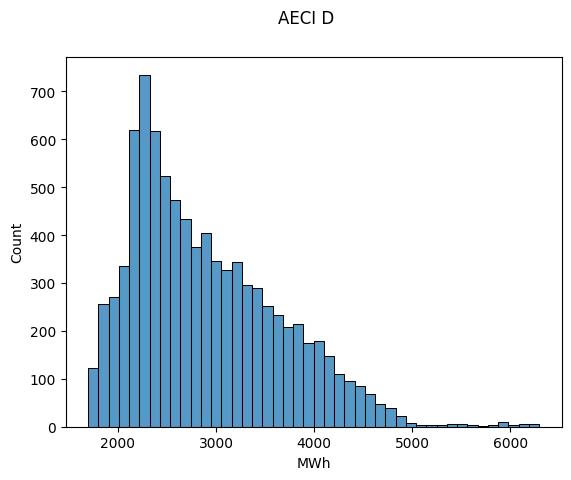

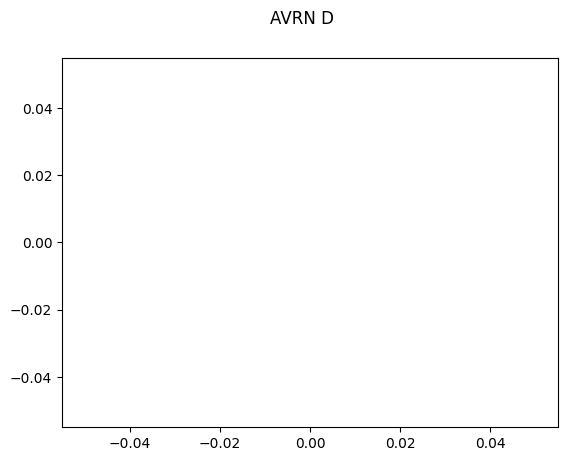

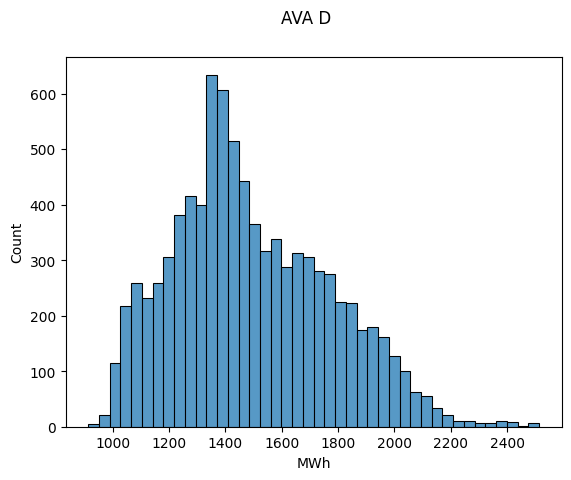

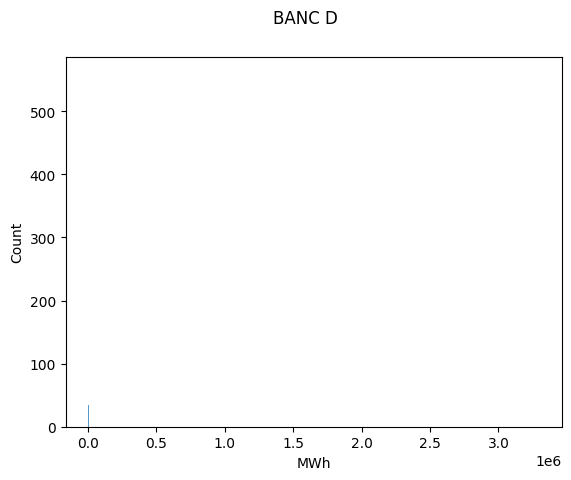

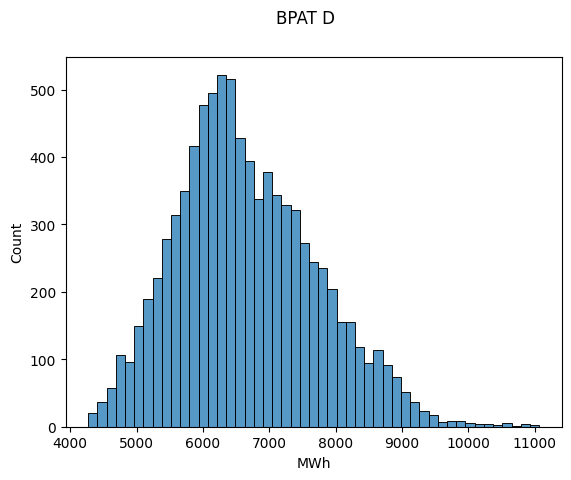

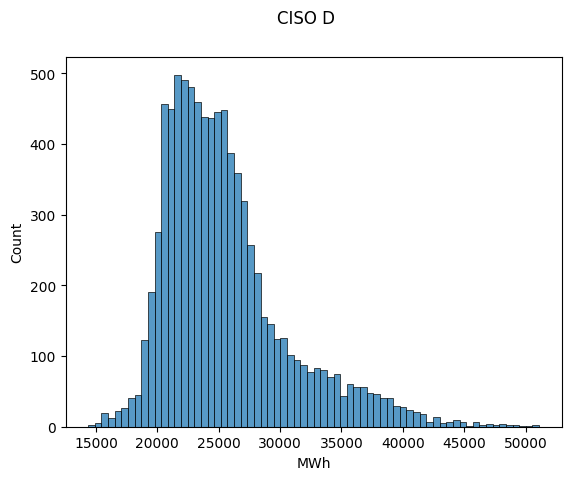

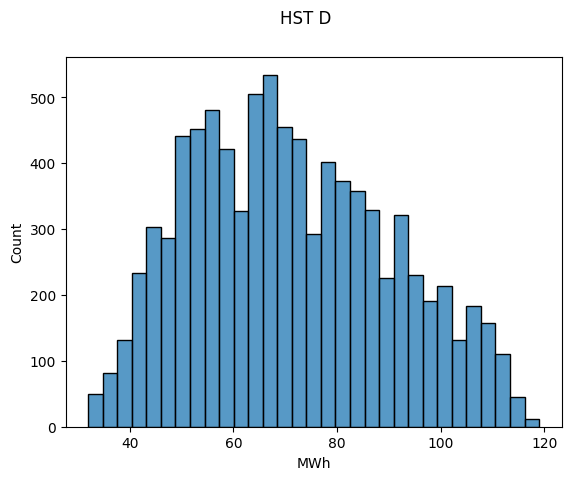

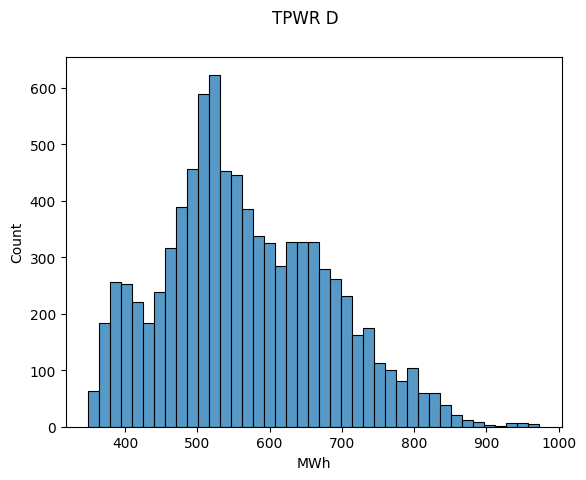

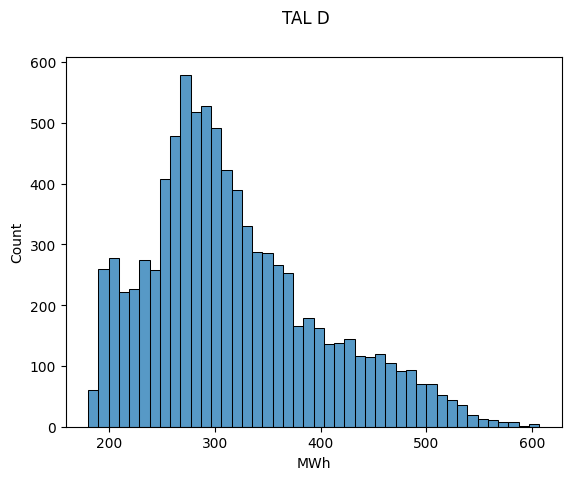

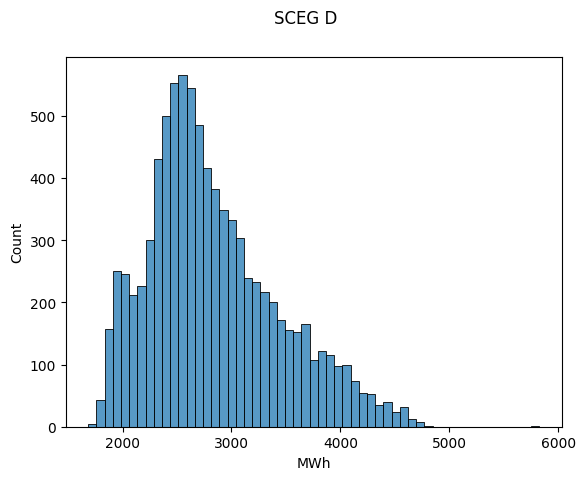

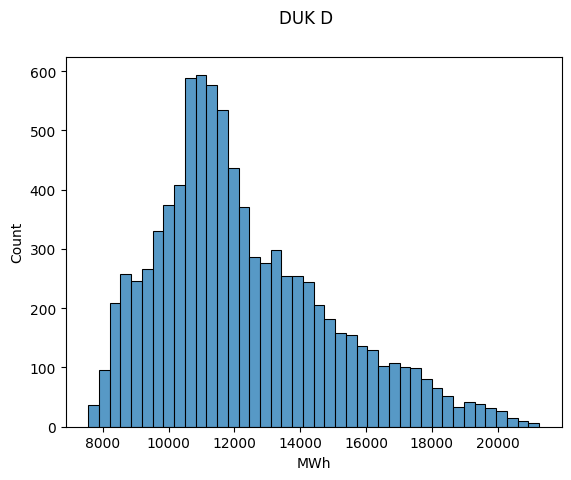

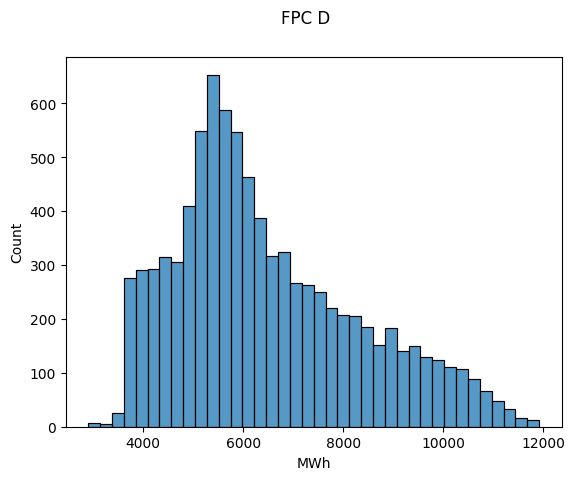

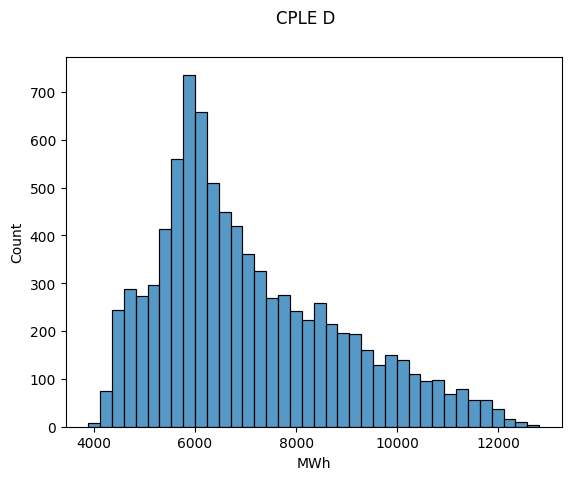

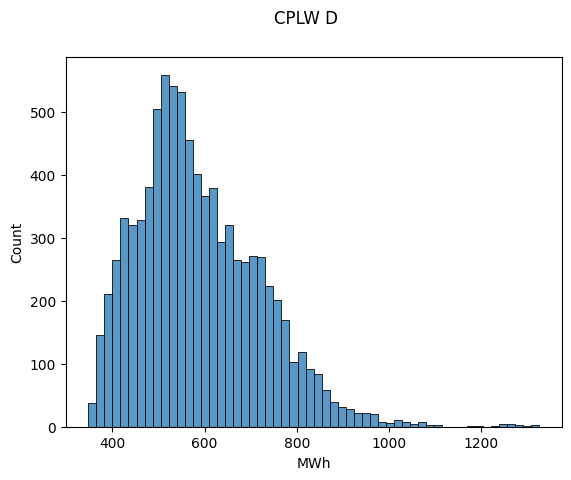

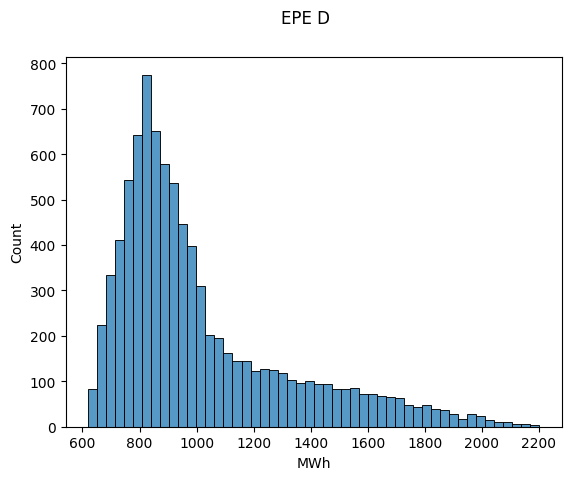

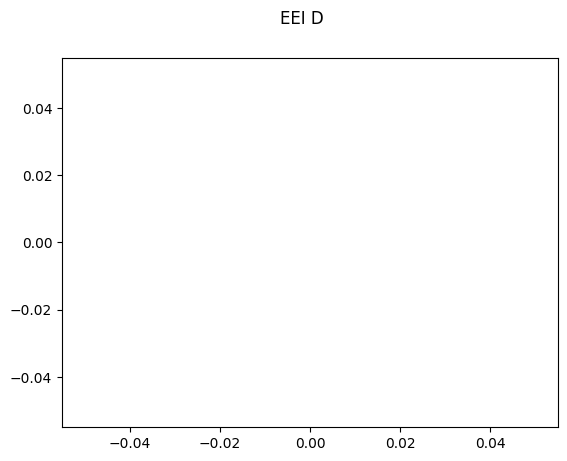

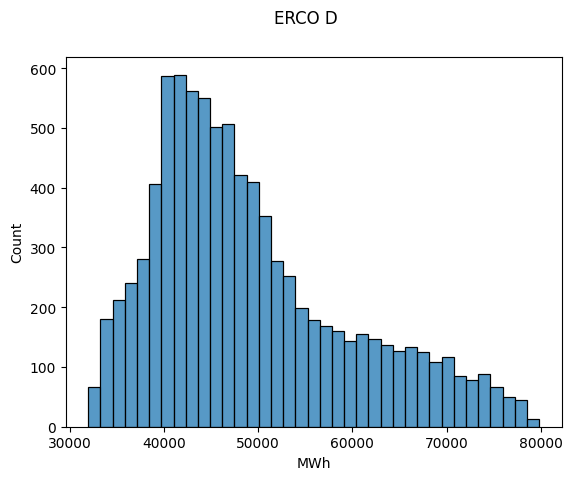

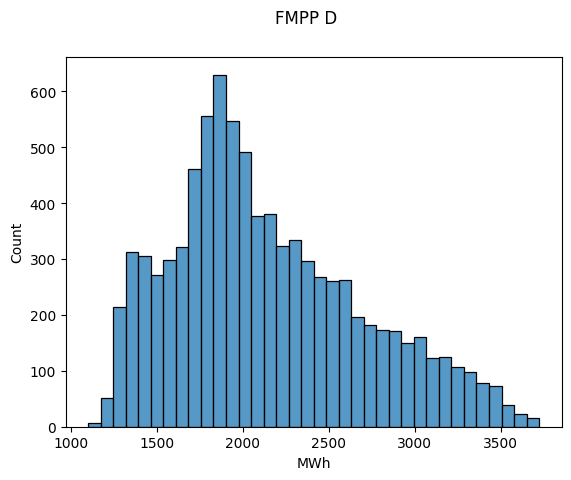

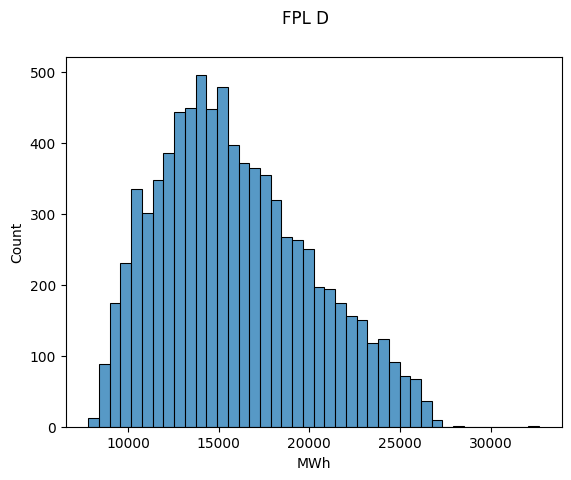

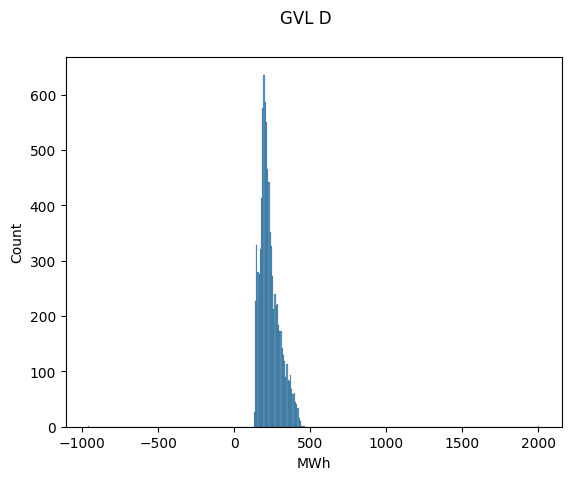

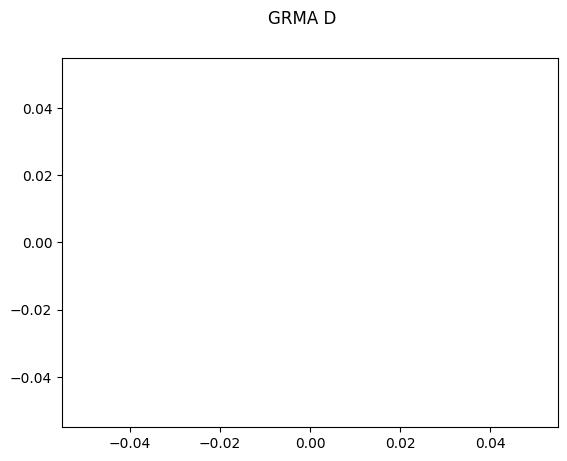

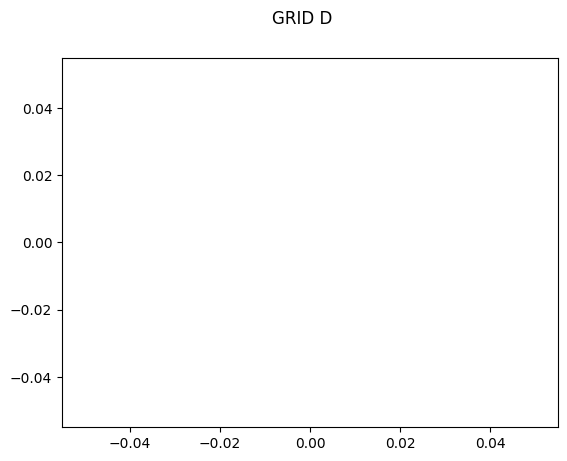

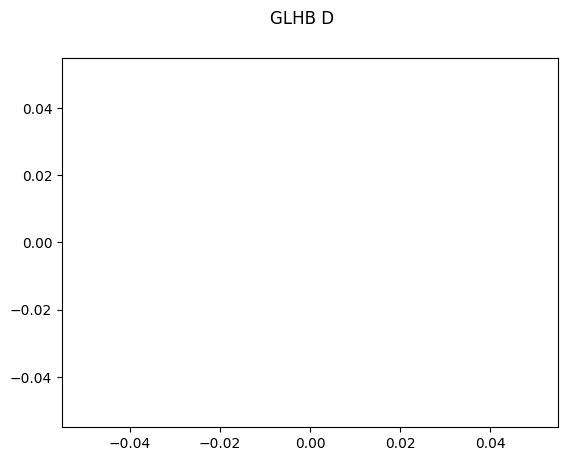

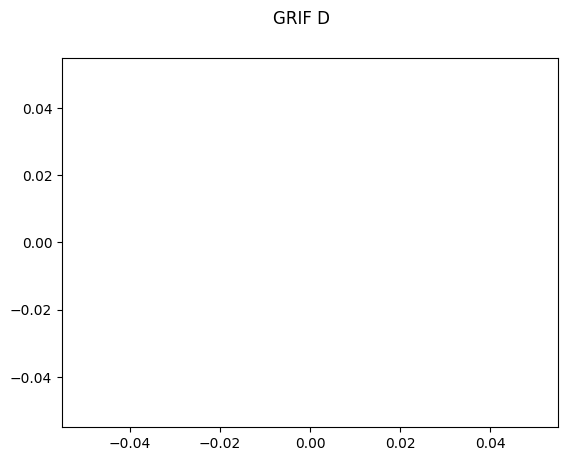

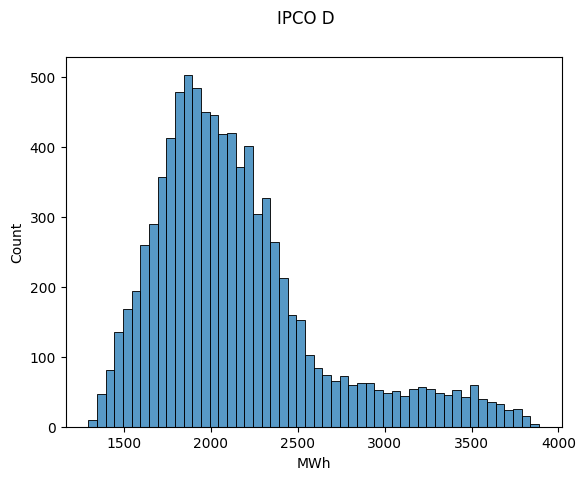

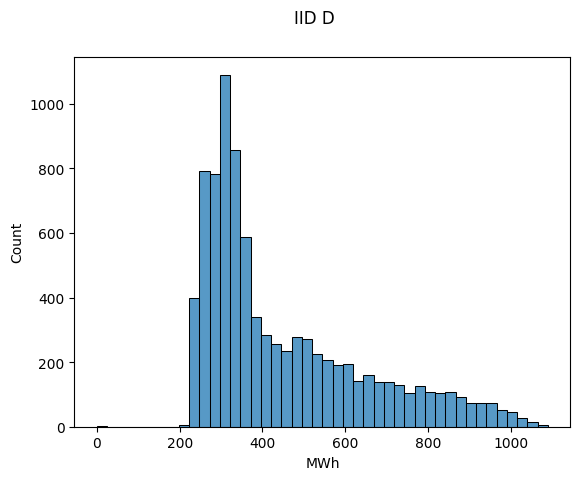

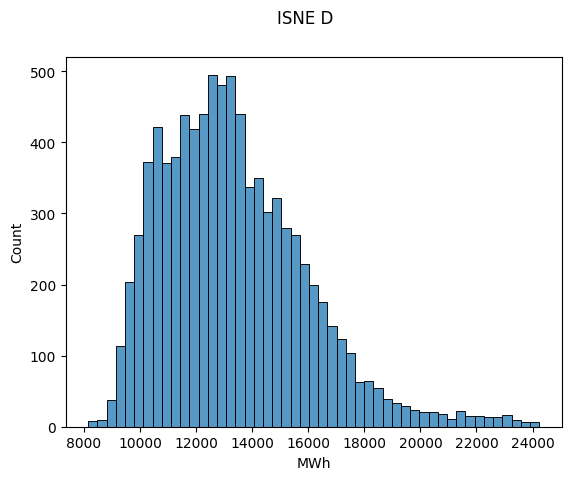

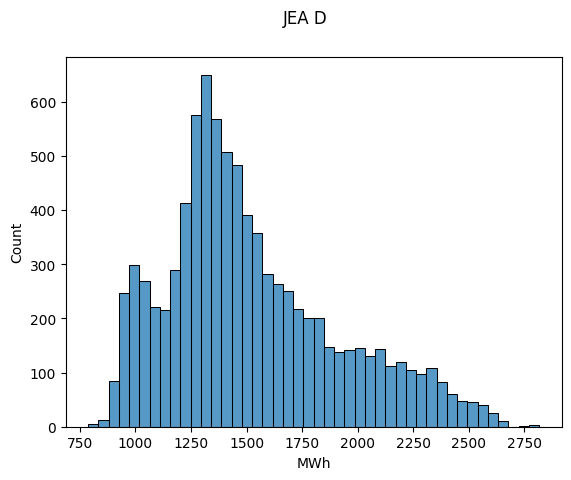

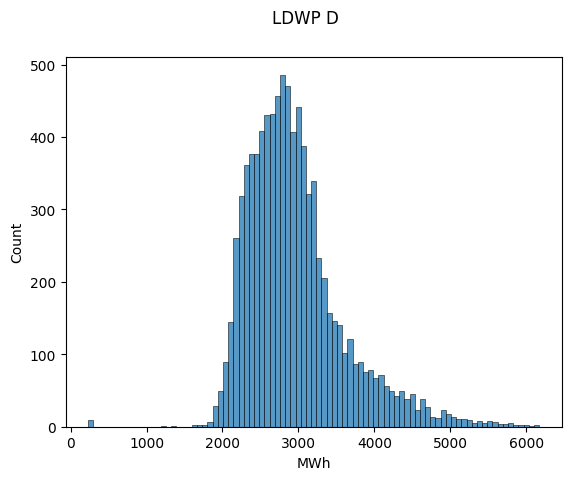

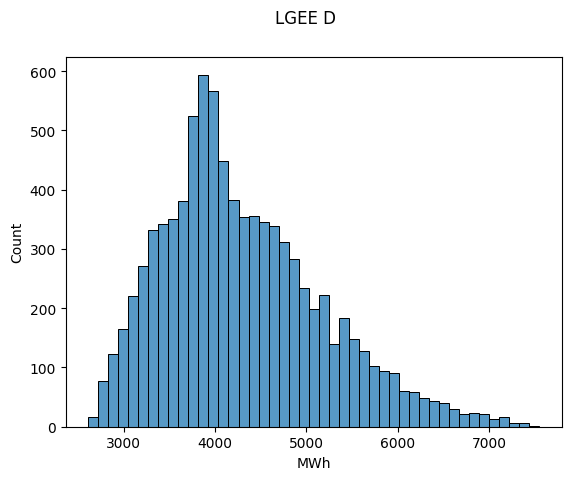

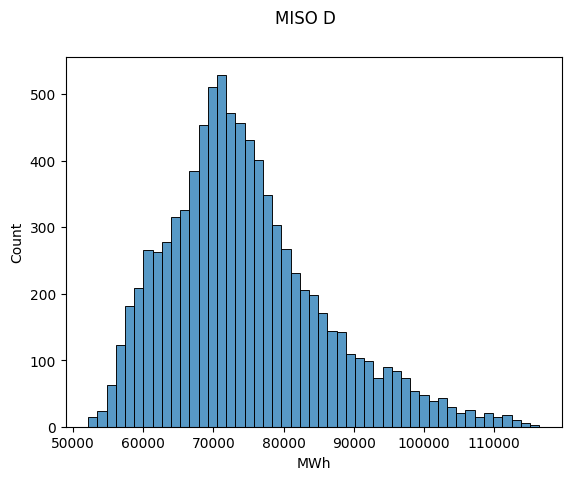

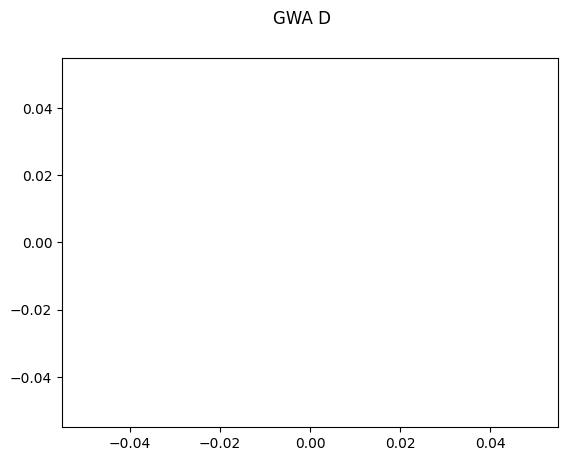

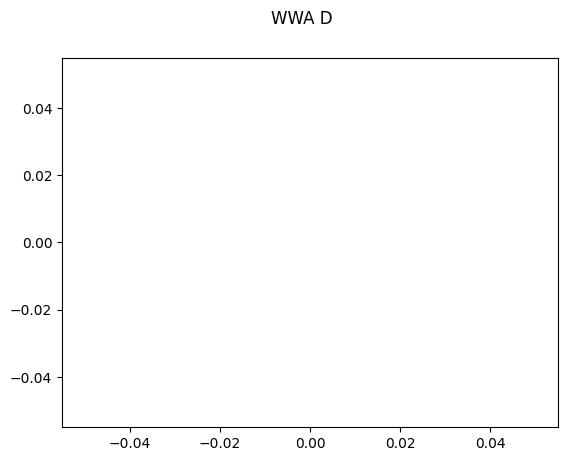

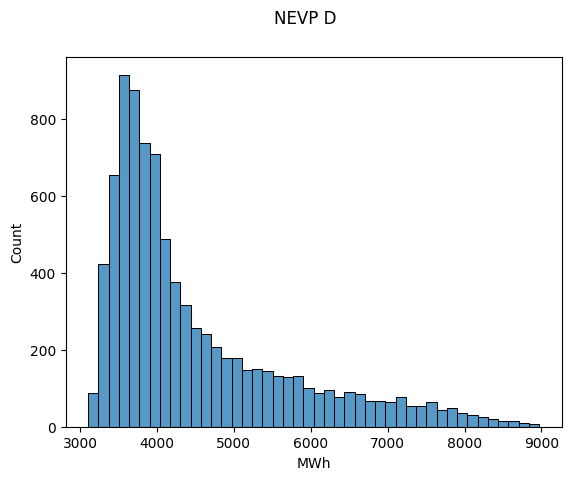

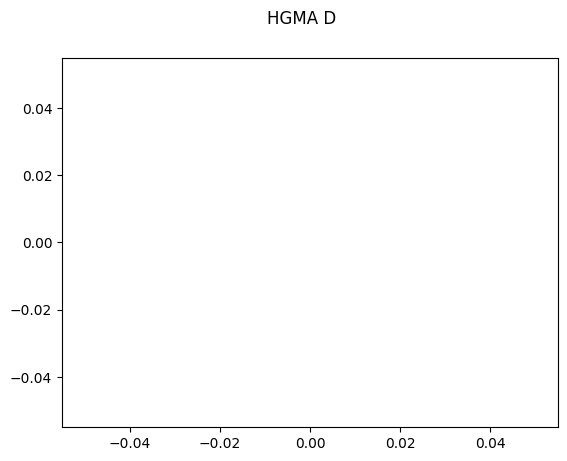

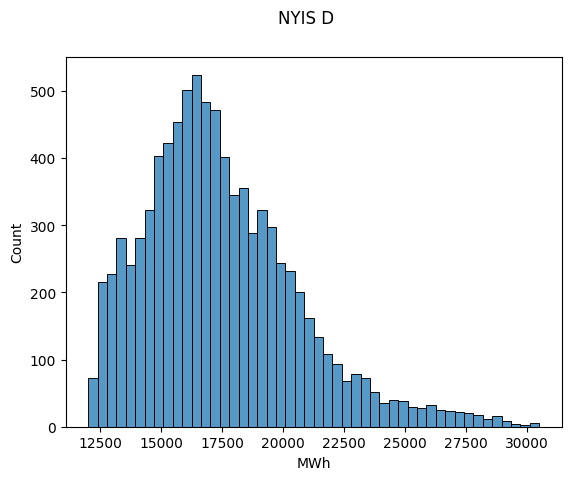

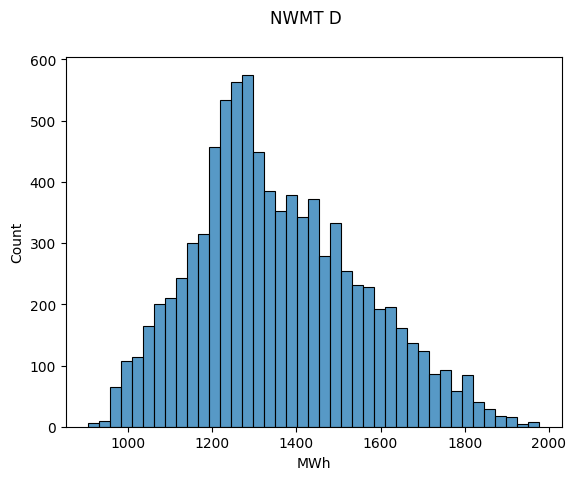

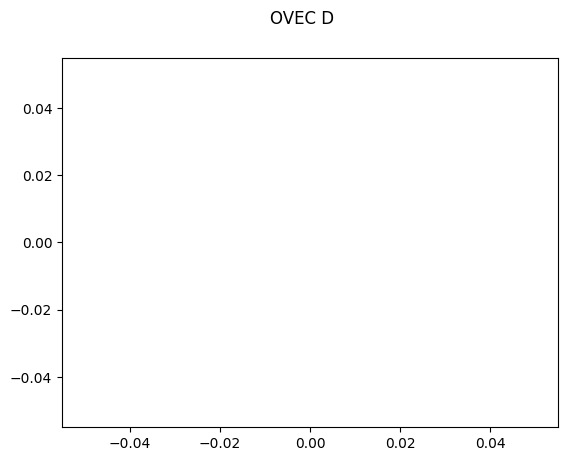

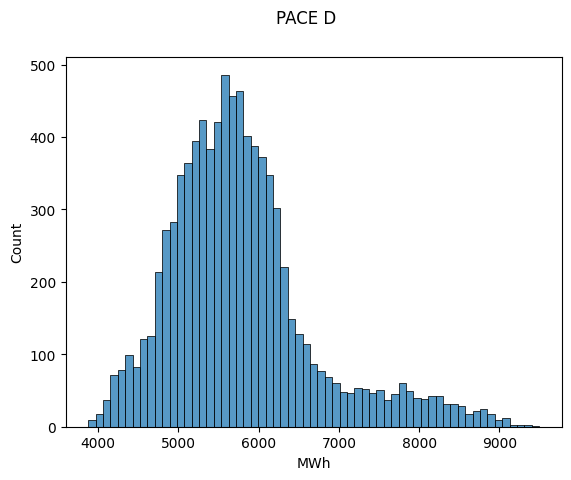

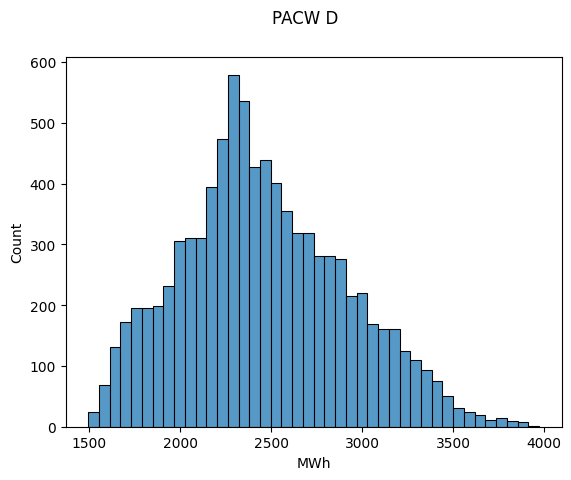

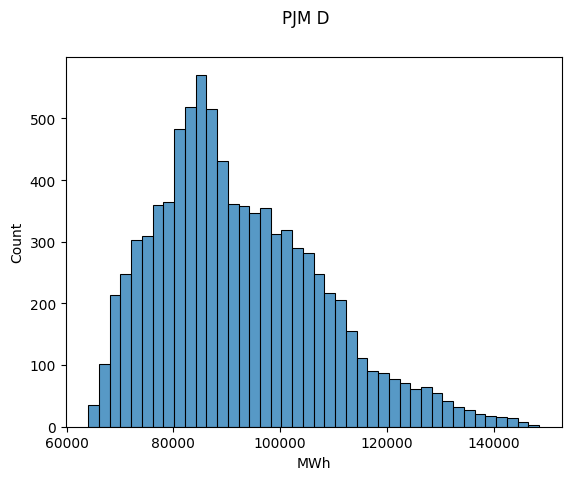

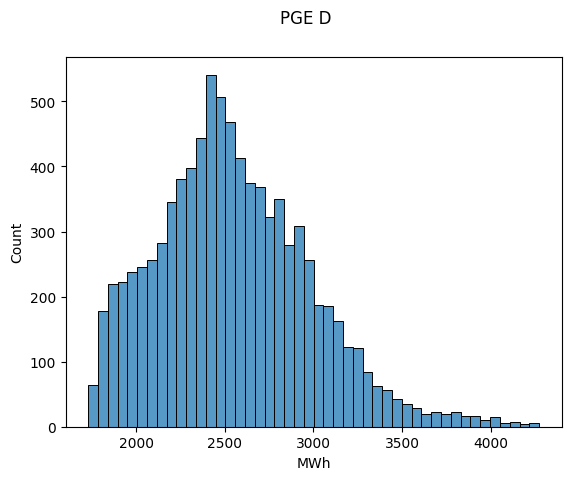

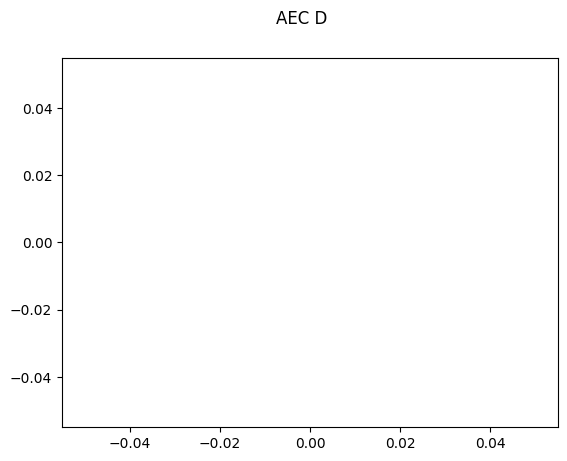

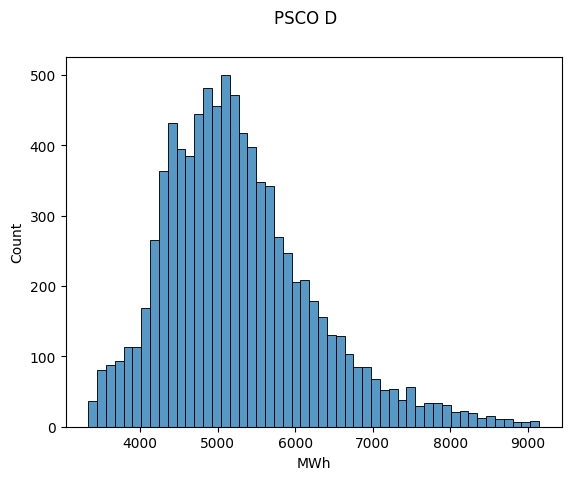

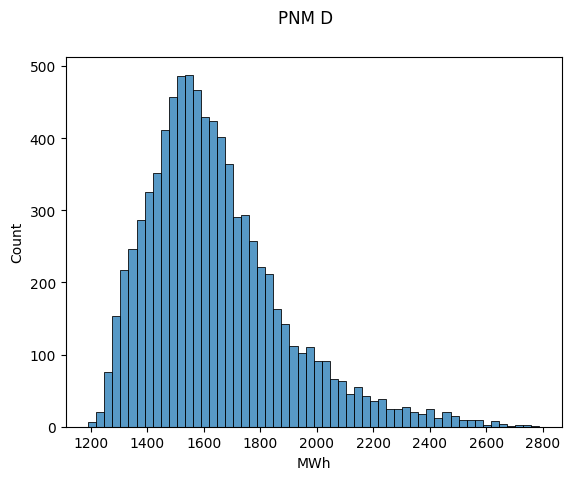

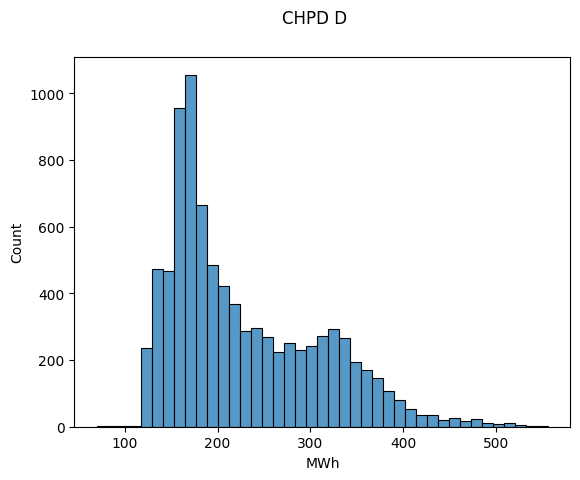

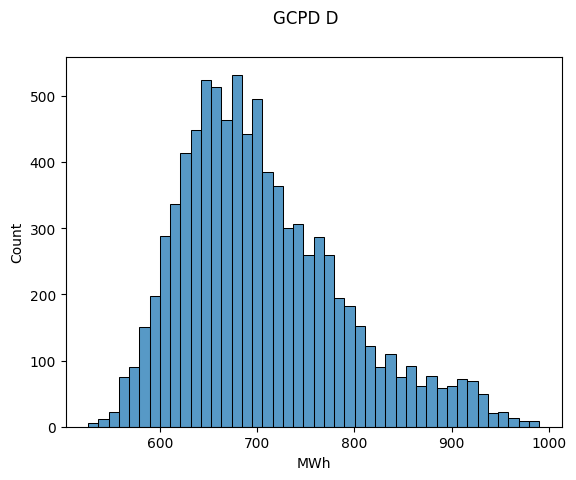

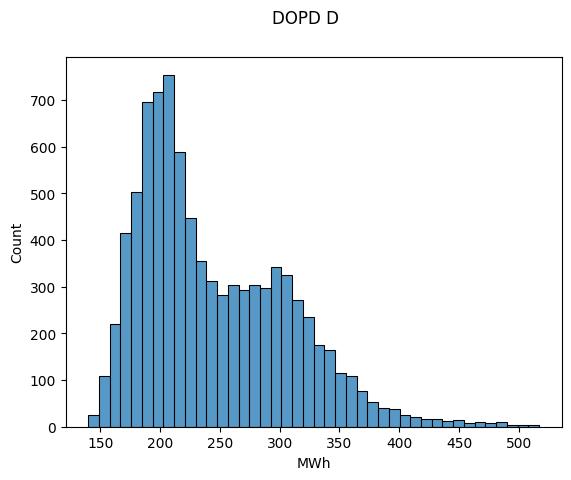

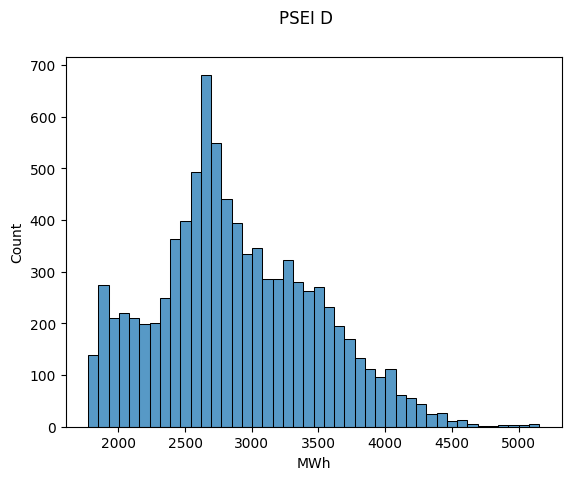

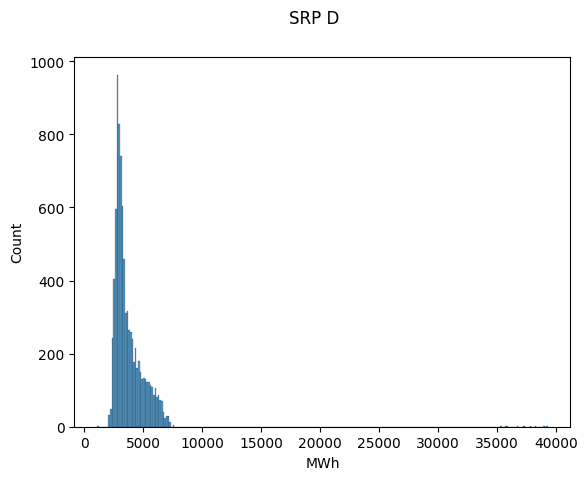

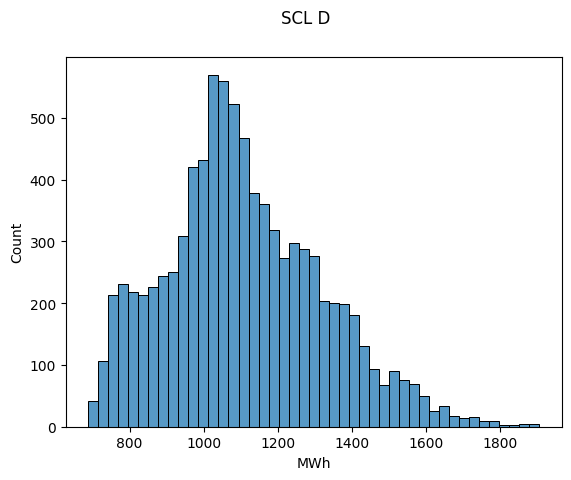

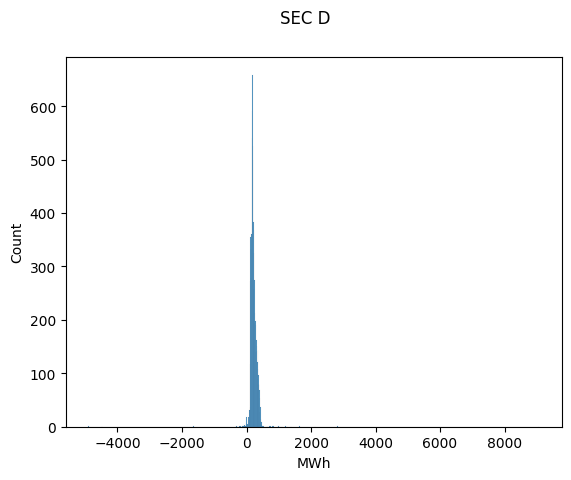

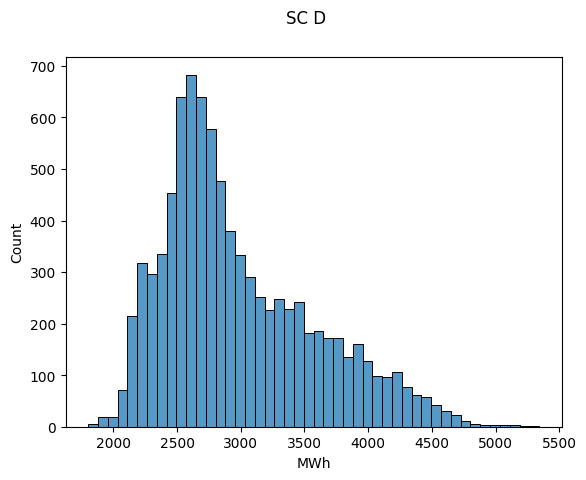

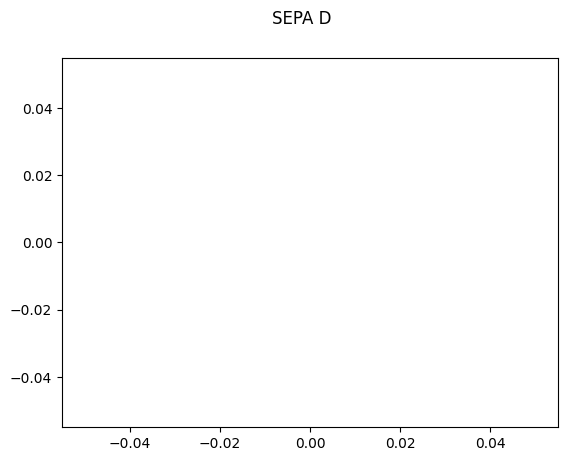

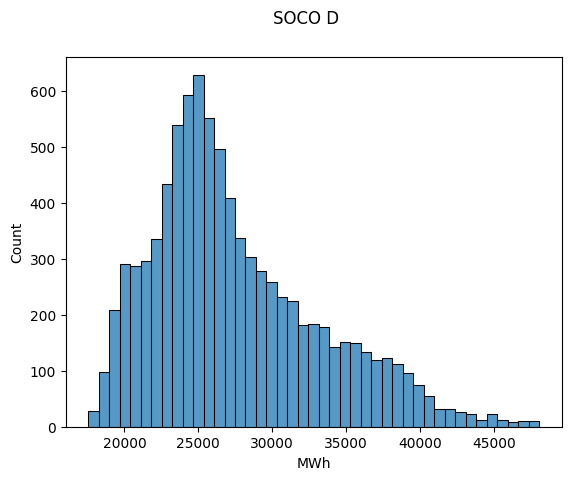

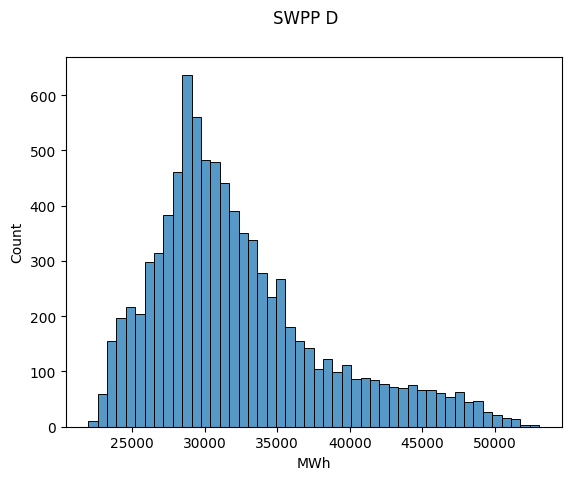

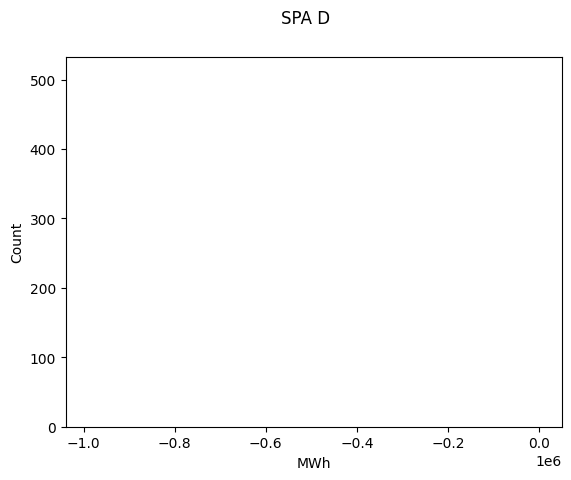

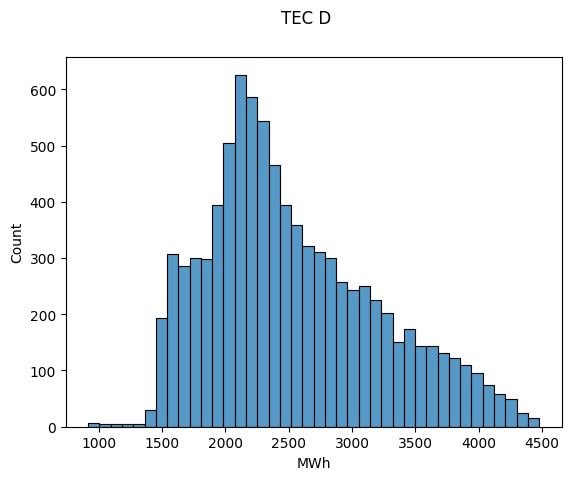

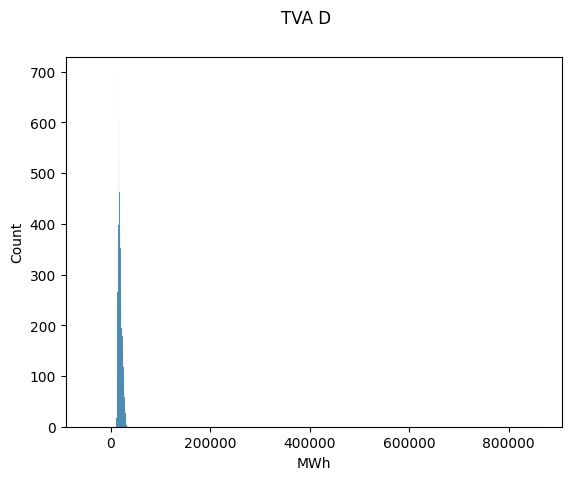

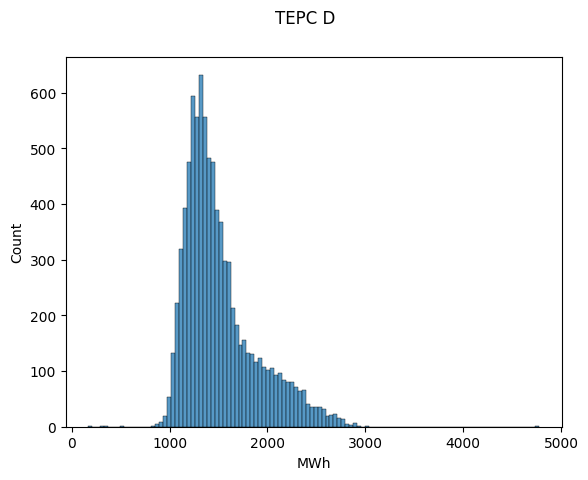

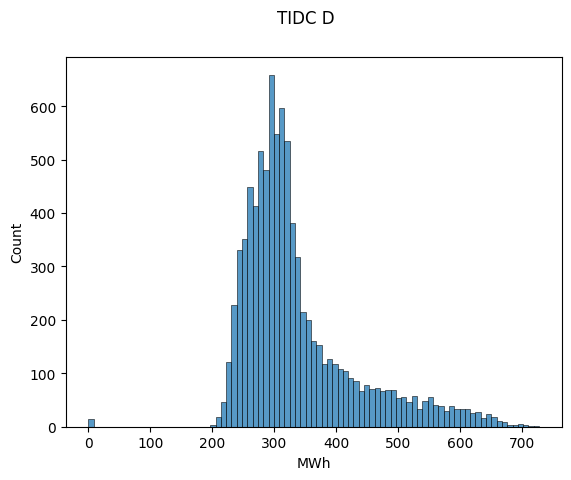

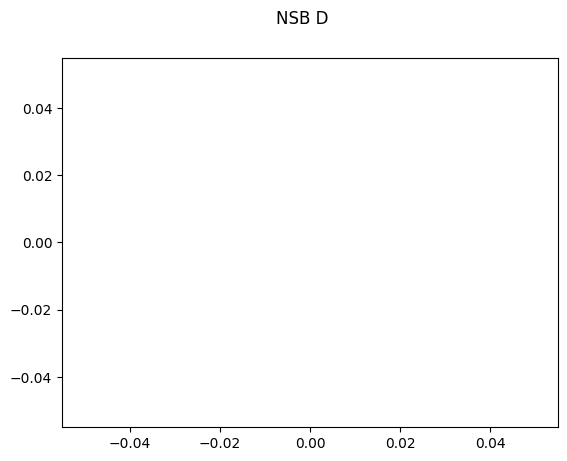

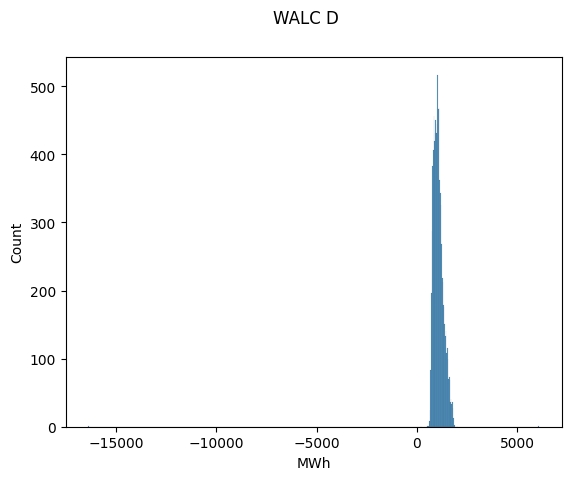

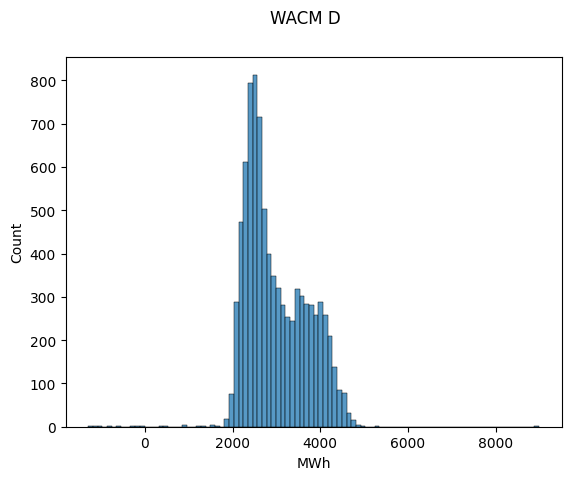

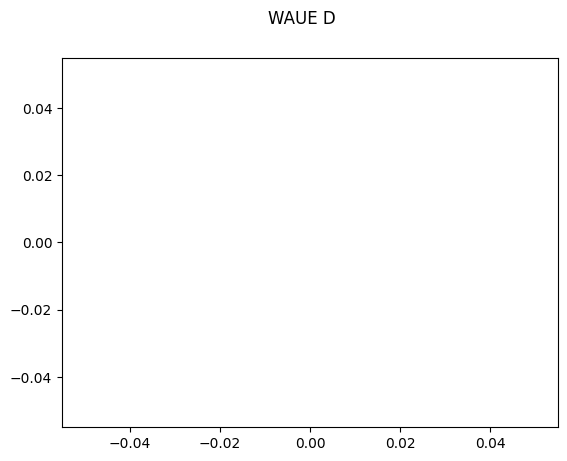

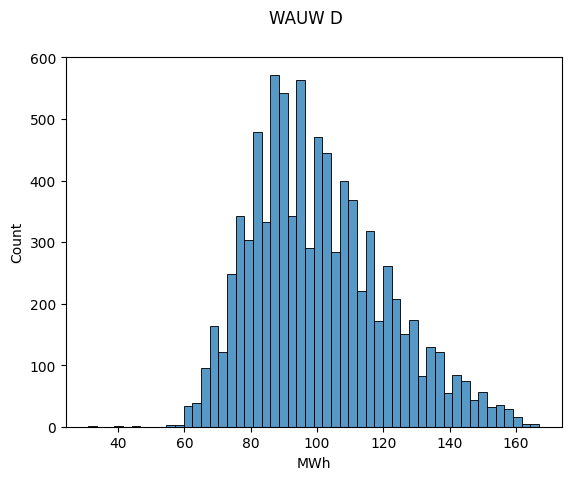

In [113]:
etype = 'D'
p=0
for BA in BA_dict:
    fig=plt.figure(p)
    fig.suptitle(f"{BA} {etype}")
    sns.histplot(data=BA_dict[BA][etype], x='MWh')
    plt.show()
    p += 1

In [1]:
etype = 'NG'
p=0
for BA in BA_dict:
    fig=plt.figure(p)
    fig.suptitle(f"{BA} {etype}")
    sns.lineplot(data=BA_dict[BA][etype], x='MWh')
    plt.show()
    p += 1

NameError: name 'BA_dict' is not defined